# Import Required Libraries
Import the necessary libraries, including pandas and scikit-learn.

In [28]:
# Import Required Libraries
# %pip install numpy==1.26.4
# %pip install --upgrade pandas tensorflow scikit-learn
# %pip uninstall scipy scikit-learn -y
# %pip install --no-cache-dir scipy scikit-learn
# %pip uninstall gensim scipy -y
# %pip install scipy==1.13.0 gensim==4.3.3
# %pip install seaborn --upgrade


import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from IPython.display import Markdown
import seaborn as sns
import numpy as np

# Load Dataset
Load the dataset into a pandas DataFrame.

In [29]:
# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"  # Replace with your dataset file path
df = pd.read_csv(file_path)  # Load the dataset into a pandas DataFrame

# Display the first few rows of the DataFrame
df.head()

,date,demand,RRP,demand_pos_RRP,RRP_positive,demand_neg_RRP,RRP_negative,frac_at_neg_RRP,min_temperature,max_temperature,solar_exposure,rainfall,school_day,holiday
0,01-01-2015,99635.030,1382.937923,97319.240,26.415953,2315.790,-7.240000,0.020833,13.3,26.9,23.6,0.0,N,Y
1,02-01-2015,129606.010,1787.848379,121082.015,38.837661,8523.995,-47.809776,0.062500,15.4,38.8,26.8,0.0,N,N
2,03-01-2015,142300.540,1864.773918,142300.540,34.564855,0.000,0.000000,0.000000,20.0,38.2,26.5,0.0,N,N
3,04-01-2015,104330.715,1349.049975,104330.715,25.005560,0.000,0.000000,0.000000,16.3,21.4,25.2,4.2,N,N
4,05-01-2015,118132.200,1441.769310,118132.200,26.724176,0.000,0.000000,0.000000,15.0,22.0,30.7,0.0,N,N


# Handle Missing Values
Identify and handle missing values in the dataset using techniques such as imputation or removal.

In [30]:
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
print("Missing values in each column before handling:\n", df.isnull().sum())

# Option 1: Forward fill followed by backward fill
df_cleaned = df.ffill().bfill()

# Option 2: Impute missing values using bfill
df_imputed = df.copy()

# Fill numerical columns using backward fill
numeric_columns = df_imputed.select_dtypes(include=['number']).columns
df_imputed[numeric_columns] = df_imputed[numeric_columns].bfill()

# Fill categorical columns using backward fill
categorical_columns = df_imputed.select_dtypes(include=['object']).columns
df_imputed[categorical_columns] = df_imputed[categorical_columns].bfill()

# Encode Categorical Variables
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_imputed[column] = label_encoder.fit_transform(df_imputed[column])

# Display results
print("Missing values after handling:\n", df_imputed.isnull().sum())
print("Cleaned DataFrame:\n", df_cleaned.head())
print("Imputed DataFrame:\n", df_imputed.head())



Missing values in each column before handling:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     1
rainfall           3
school_day         0
holiday            0
dtype: int64
Missing values after handling:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64
Cleaned DataFrame:
          date      demand          RRP  demand_pos_RRP  RRP_positive  \
0  01-01-2015   99635.030  1382.937923       97319.240     26.415953   
1  02-01-2015  129606.010  1787.848379      121082.015     38.837661   
2  03-01-2015  142300.540  1864.773918      142300.540     34.564855  

# DEMAND ANALYSIS AND PRICE ANALYSIS


## DAILY DEMAND ANALYSIS

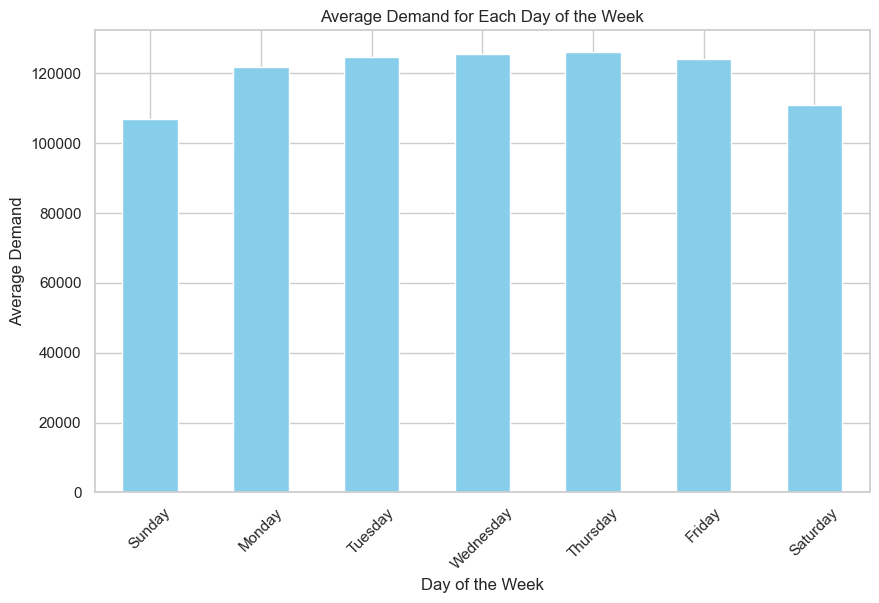

**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day.

In [31]:
# Demand and Price Analysis
import matplotlib.pyplot as plt
import calendar as cal

# Convert 'date' column to datetime format
import matplotlib.dates as mdates
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')


# Set 'date' as the index
df.set_index('date', inplace=True)

# Add a column for the day of the week
df['day_of_week'] = df.index.day_name()

# Group by day of the week and calculate the average demand
average_demand_by_day = df.groupby('day_of_week')['demand'].mean().reindex(['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday'])

# Plot the average demand for each day of the week
plt.figure(figsize=(10, 6))
average_demand_by_day.plot(kind='bar', color='skyblue')
plt.title('Average Demand for Each Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Average Demand')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()
display(Markdown("**Daily Demand Analysis:** A bar plot groups the data by the day of the week (Sunday to Saturday) and shows the average demand for each day."))


## Weekly Demand Variations

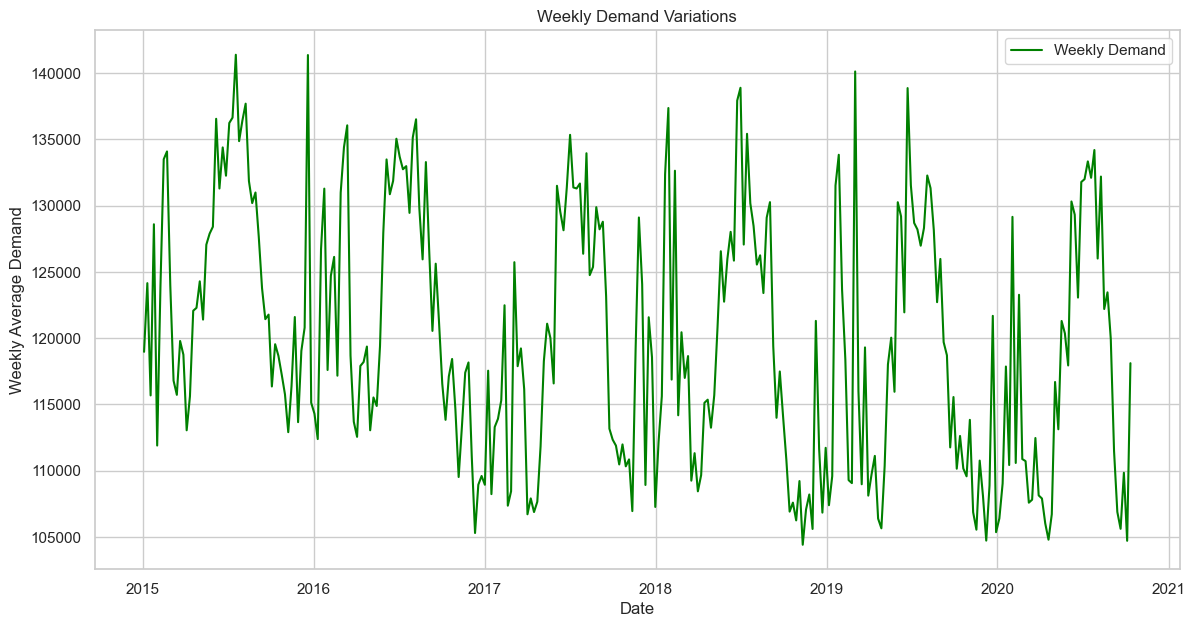

**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations.

In [32]:
# Plot weekly demand variations
weekly_demand = df['demand'].resample('W').mean()
plt.figure(figsize=(14, 7))
plt.plot(weekly_demand, label='Weekly Demand', color='green')
plt.title('Weekly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Weekly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Weekly Demand Variations:** A line plot that resamples demand data weekly to reveal trends and fluctuations."))

## Yearly Demand Variations

C:\Users\saina\AppData\Local\Temp\ipykernel_25020\1418829592.py:2: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  yearly_demand = df['demand'].resample('Y').mean()


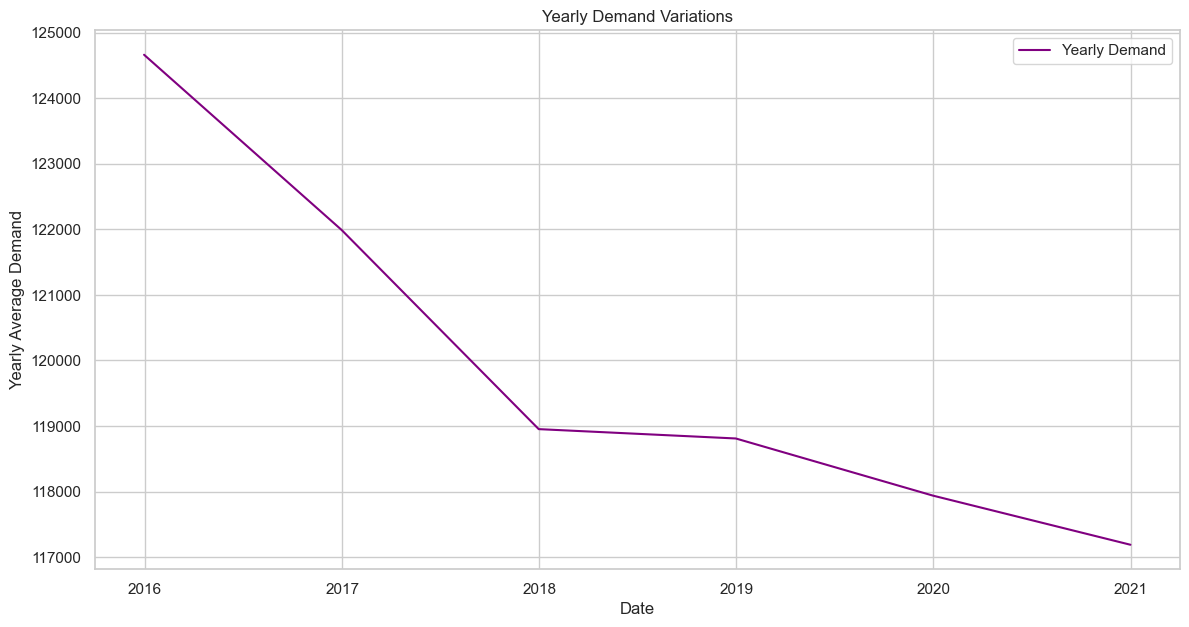

**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends.

In [33]:
# Plot yearly demand variations
yearly_demand = df['demand'].resample('Y').mean()
plt.figure(figsize=(14, 7))
plt.plot(yearly_demand, label='Yearly Demand', color='purple')
plt.title('Yearly Demand Variations')
plt.xlabel('Date')
plt.ylabel('Yearly Average Demand')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Yearly Demand Variations:** A line plot aggregating demand by year to highlight long-term trends."))


## Demand vs. RRP Relationship

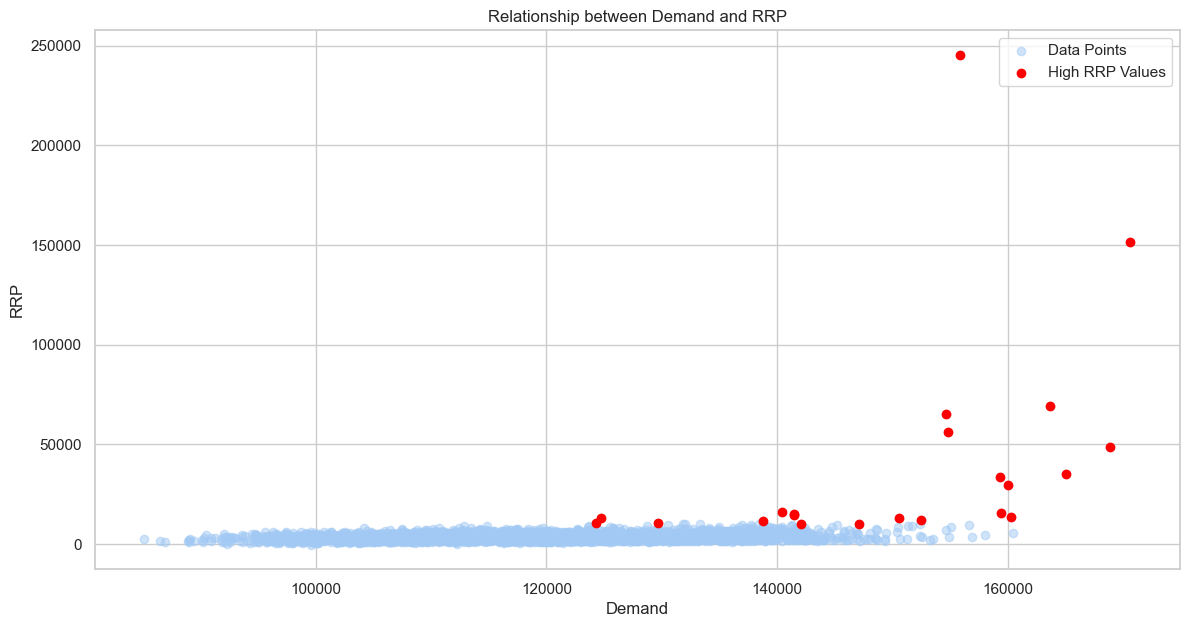

**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red.

In [34]:
# Analyze the relationship between demand and RRP
plt.figure(figsize=(14, 7))

# Identify high RRP values
high_rrp_threshold = df['RRP'].quantile(0.99)
high_rrp = df[df['RRP'] > high_rrp_threshold]

# Plot all data points
plt.scatter(df['demand'], df['RRP'], alpha=0.5, label='Data Points')

# Highlight high RRP values
plt.scatter(high_rrp['demand'], high_rrp['RRP'], color='red', label='High RRP Values')

plt.title('Relationship between Demand and RRP')
plt.xlabel('Demand')
plt.ylabel('RRP')
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Demand vs. RRP Relationship:** A scatter plot showing the relationship between demand and RRP with high RRP values (above the 99th percentile) highlighted in red."))


## Monthly Average Demand Analysis

C:\Users\saina\AppData\Local\Temp\ipykernel_25020\674040574.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_demand = df['demand'].resample('M').mean()


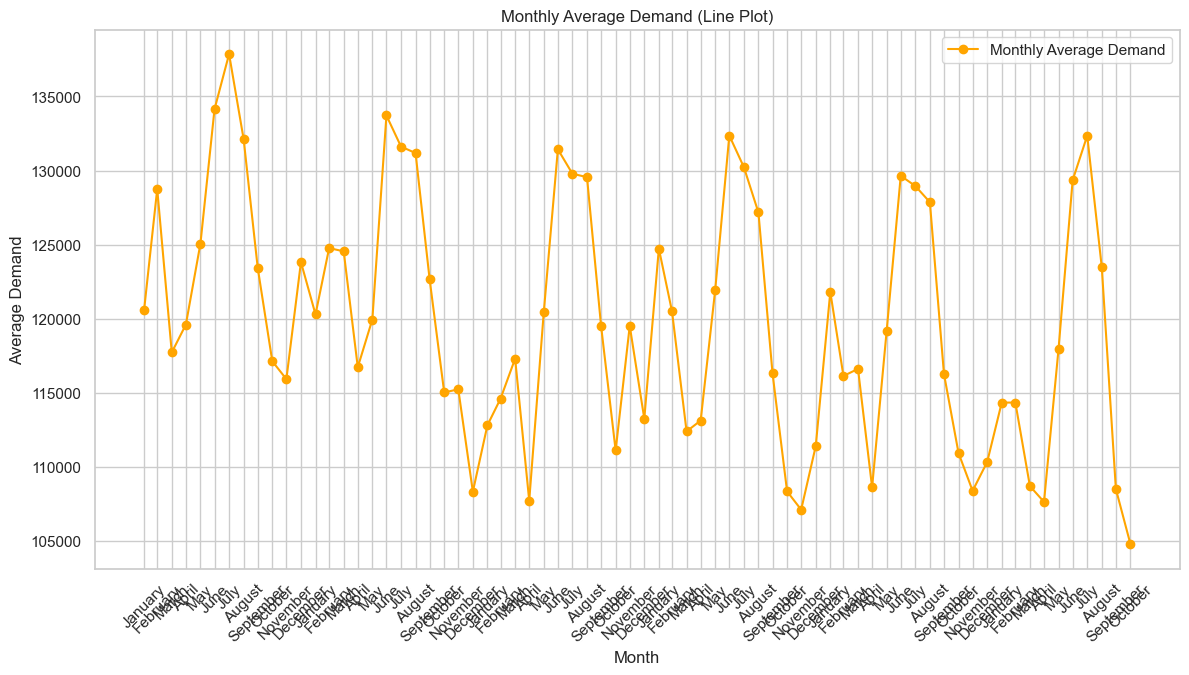

**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year.

In [35]:
# Plot monthly average demand as a line plot
monthly_demand = df['demand'].resample('M').mean()
plt.figure(figsize=(14, 7))
plt.plot(monthly_demand, marker='o', linestyle='-', color='orange', label='Monthly Average Demand')
plt.title('Monthly Average Demand (Line Plot)')
plt.xlabel('Month')
plt.ylabel('Average Demand')
import calendar
month_names = [calendar.month_name[dt.month] for dt in monthly_demand.index]
plt.xticks(monthly_demand.index, month_names, rotation=45)
plt.legend()
plt.grid(True)
plt.show()
display(Markdown("**Monthly Average Demand Analysis:** A line plot representing monthly average demand, displaying seasonal variations throughout the year."))

## High Demand and Price Spikes

In [36]:
# Identify periods with high demand and significant price spikes
high_demand = df[df['demand'] > df['demand'].quantile(0.95)]
high_price_spikes = high_demand[high_demand['RRP'] > df['RRP'].quantile(0.95)]
print('Periods with high demand and significant price spikes:')
print(high_price_spikes)

Periods with high demand and significant price spikes:
                demand            RRP  demand_pos_RRP  RRP_positive  \
date                                                                  
2015-12-17  152366.300   10147.246460      152366.300    188.086125   
2016-01-13  160011.075   29442.555370      160011.075    545.737820   
2016-03-08  160285.015   13651.078150      160285.015    253.032032   
2016-07-05  142401.795    7940.775981      142401.795    147.187692   
2017-02-08  142213.660    7286.556018      142213.660    135.061279   
2017-02-09  155060.610    8453.941341      151642.620    163.717084   
2017-08-03  151355.430    9130.164971      151355.430    169.233827   
2017-11-29  151730.950    8985.515294      151730.950    166.552647   
2018-01-18  154648.065   65286.940800      154648.065   1210.137920   
2018-01-19  165070.595   34936.626120      165070.595    647.574163   
2018-01-28  159436.690   15668.139790      159436.690    290.419644   
2018-02-07  159307.315

# Weather Impact Analysis
### 1. Importing Required Libraries

In [37]:
import matplotlib.pyplot as plt 
import seaborn as sns
import pandas as pd

### 2. Setting Visualization Style

In [38]:
sns.set(style="whitegrid", palette="pastel")

### 3. Removing Extreme Outliers (Excluding Rainfall)

In [39]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder

# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Handle Missing Values
df_cleaned = df.ffill().bfill()  # Forward fill followed by backward fill

# Function to remove outliers using IQR, excluding "rainfall"
def remove_outliers_iqr(data, exclude_column):
    num_data = data.select_dtypes(include=['number'])  # Select only numerical columns
    if exclude_column in num_data.columns:
        num_data = num_data.drop(columns=[exclude_column])  # Drop "rainfall" from outlier detection

    Q1 = num_data.quantile(0.25)
    Q3 = num_data.quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    
    # Mask to keep only rows where all numerical values (except "rainfall") are within bounds
    mask = ~((num_data < lower_bound) | (num_data > upper_bound)).any(axis=1)
    
    return data[mask]  # Return the filtered dataset

# Remove outliers except for "rainfall"
df_no_outliers = remove_outliers_iqr(df_cleaned, "rainfall")

# Fill missing values after outlier removal
df_no_outliers = df_no_outliers.bfill()

# Encode Categorical Variables
categorical_columns = df_no_outliers.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()
for column in categorical_columns:
    df_no_outliers[column] = label_encoder.fit_transform(df_no_outliers[column])

# Display results
print("Missing values after handling:\n", df_no_outliers.isnull().sum())
print("Dataset after removing outliers (except for rainfall):\n", df_no_outliers.head())


Missing values after handling:
 date               0
demand             0
RRP                0
demand_pos_RRP     0
RRP_positive       0
demand_neg_RRP     0
RRP_negative       0
frac_at_neg_RRP    0
min_temperature    0
max_temperature    0
solar_exposure     0
rainfall           0
school_day         0
holiday            0
dtype: int64
Dataset after removing outliers (except for rainfall):
    date      demand          RRP  demand_pos_RRP  RRP_positive  \
3   175  104330.715  1349.049975      104330.715     25.005560   
4   239  118132.200  1441.769310      118132.200     26.724176   
5   297  130672.485  1687.680664      130672.485     31.282311   
7   418  142015.655  2649.877272      142015.655     49.117280   
8   479  121801.155  1860.771941      121801.155     34.490675   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
3             0.0           0.0              0.0             16.3   
4             0.0           0.0              0.0             15.0   
5

### 4. Outlier Removal for Numerical Variables

In [40]:
import pandas as pd

# Load Dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/complete_dataset.csv"
df = pd.read_csv(file_path)

# Define numerical variables
numerical_vars = ['demand', 'RRP', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']

# Function to remove extreme outliers using the IQR method
def remove_extreme_outliers(data, columns):
    for col in columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data = data[(data[col] >= lower_bound) & (data[col] <= upper_bound)]
    return data

# Remove extreme outliers except for "rainfall"
filtered_vars = [var for var in numerical_vars if var != 'rainfall' and df[var].nunique() > 10]
df_cleaned = remove_extreme_outliers(df, filtered_vars)

# Save the cleaned dataset
cleaned_file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv"
df_cleaned.to_csv(cleaned_file_path, index=False)

print(f"Cleaned dataset saved to: {cleaned_file_path}")


Cleaned dataset saved to: ../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv


### 5. Visualizing Data Distributions

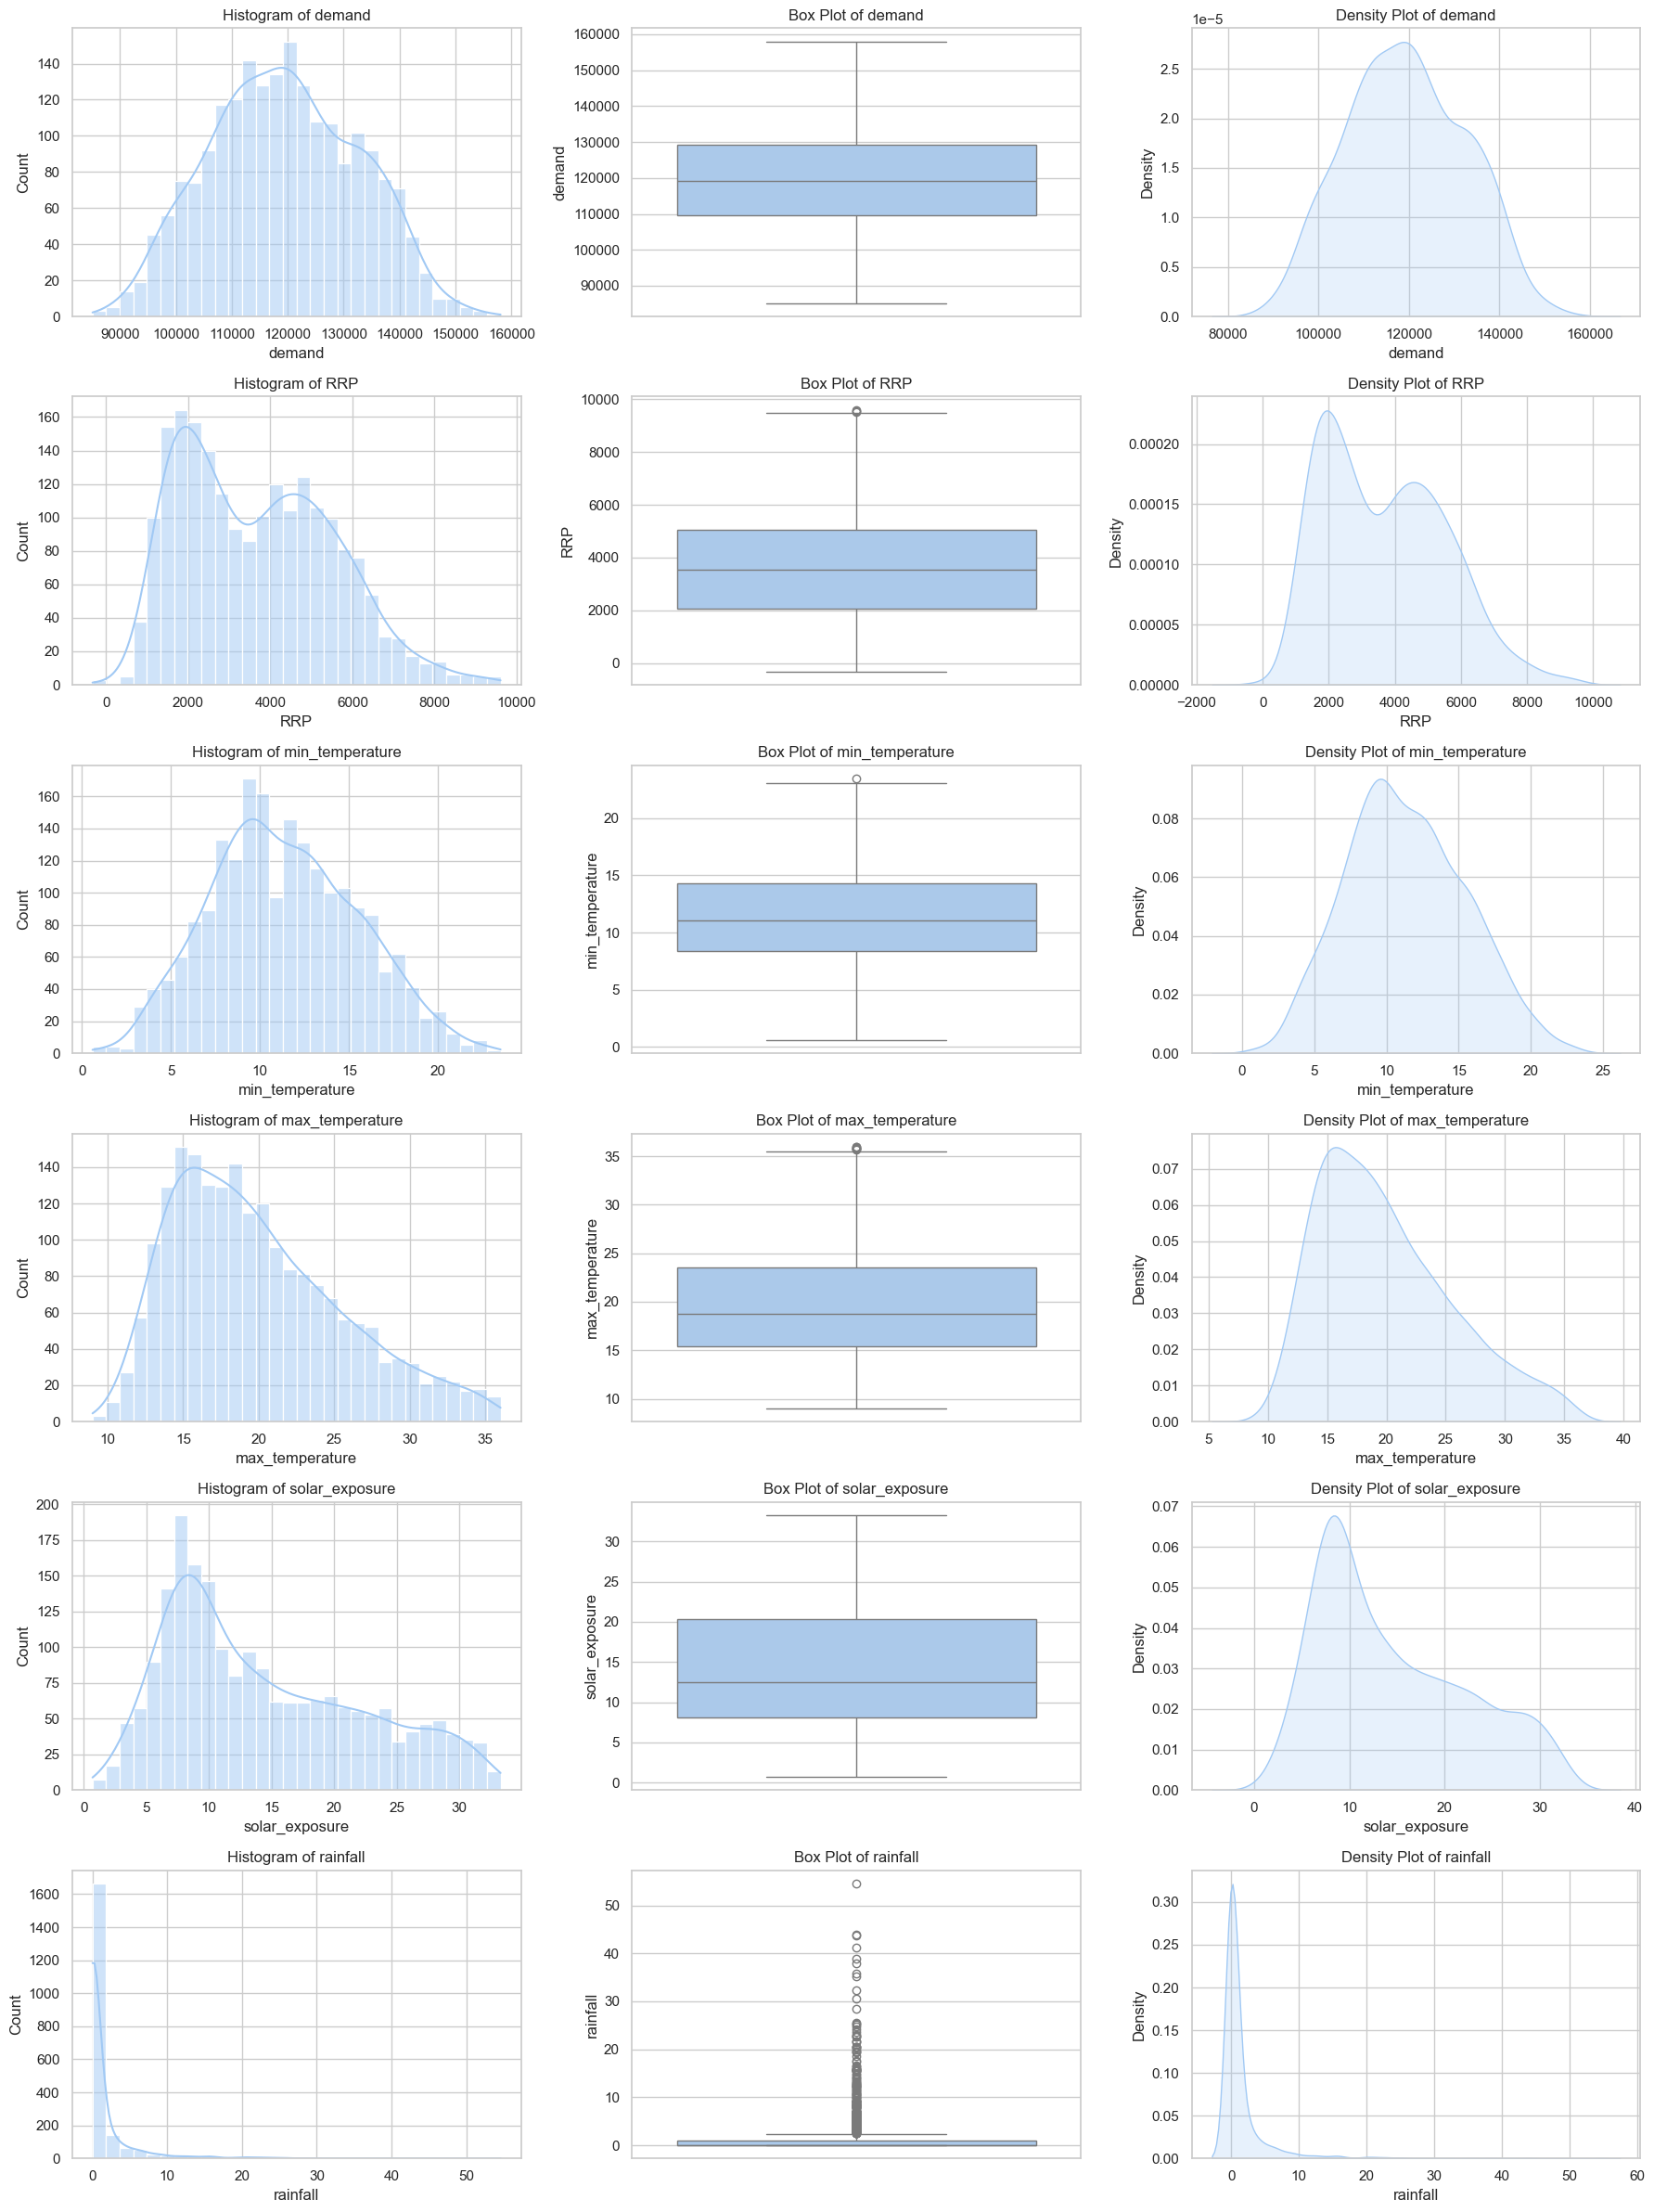

In [41]:
fig, axes = plt.subplots(len(numerical_vars), 3, figsize=(18, 4 * len(numerical_vars)))

for i, var in enumerate(numerical_vars):
    # Histogram
    sns.histplot(df_cleaned[var].dropna(), bins=30, kde=True, ax=axes[i, 0])
    axes[i, 0].set_title(f'Histogram of {var}')
    
    # Box Plot
    sns.boxplot(y=df_cleaned[var].dropna(), ax=axes[i, 1])
    axes[i, 1].set_title(f'Box Plot of {var}')
    
    # KDE Density Plot (only if sufficient unique values exist)
    if df_cleaned[var].nunique() > 1:
        sns.kdeplot(df_cleaned[var].dropna(), fill=True, ax=axes[i, 2])
        axes[i, 2].set_title(f'Density Plot of {var}')
    else:
        axes[i, 2].set_title(f'Insufficient Data for KDE: {var}')

plt.tight_layout()
plt.show()

### 6. Categorical Variable Analysis

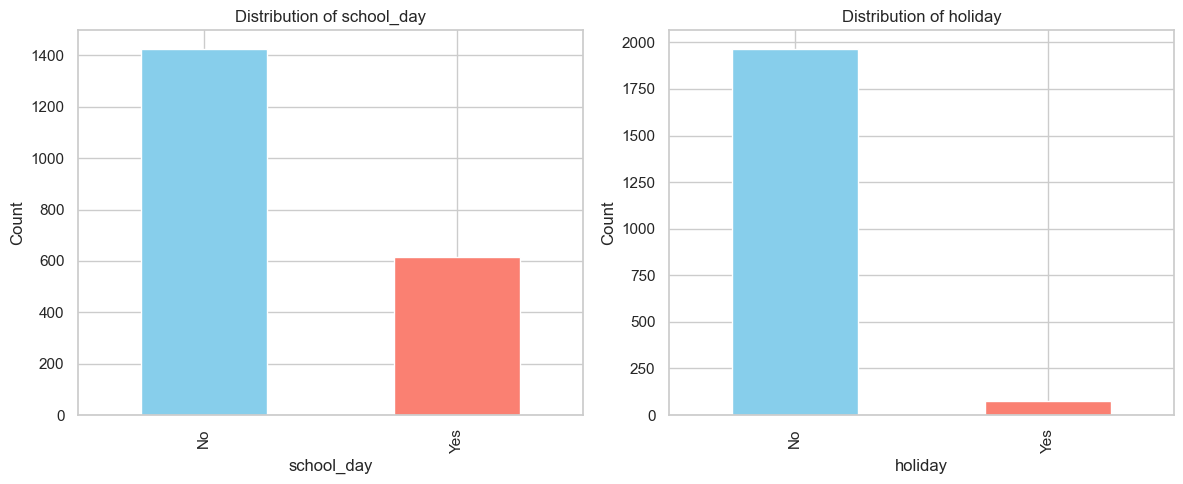

In [42]:
# Categorical Variables
categorical_vars = ['school_day', 'holiday']
fig, ax = plt.subplots(1, len(categorical_vars), figsize=(12, 5))

for i, var in enumerate(categorical_vars):
    df_cleaned[var].value_counts().plot(kind='bar', color=['skyblue', 'salmon'], ax=ax[i])
    ax[i].set_title(f'Distribution of {var}')
    ax[i].set_xlabel(var)
    ax[i].set_ylabel('Count')
    ax[i].set_xticks([0, 1])
    ax[i].set_xticklabels(['No', 'Yes'])

plt.tight_layout()
plt.show()

### 7. Correlation Heatmap (Demand vs. Weather Factors)

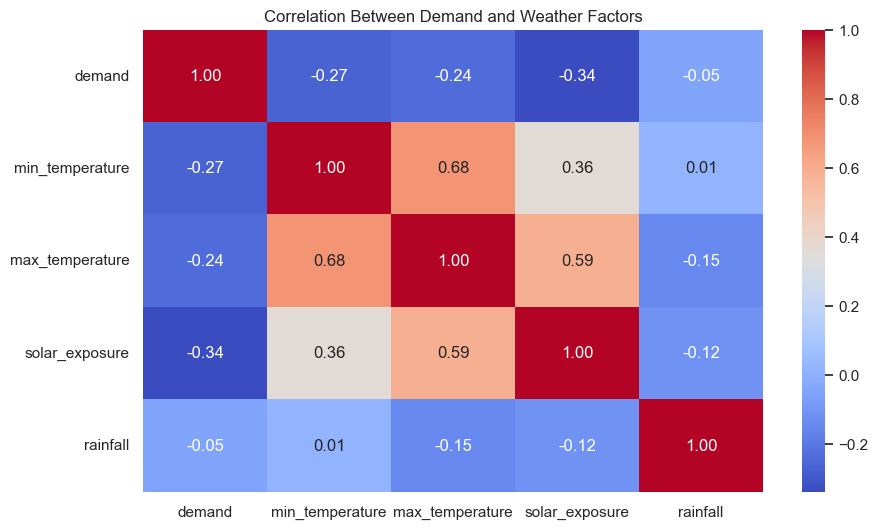

In [43]:
# Weather Impact Analysis
# Correlation Heatmap
df_weather = df_cleaned[['demand', 'min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']]
plt.figure(figsize=(10, 6))
sns.heatmap(df_weather.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Between Demand and Weather Factors')
plt.show()


### 8. Scatter Plots (Demand vs. Weather Factors)

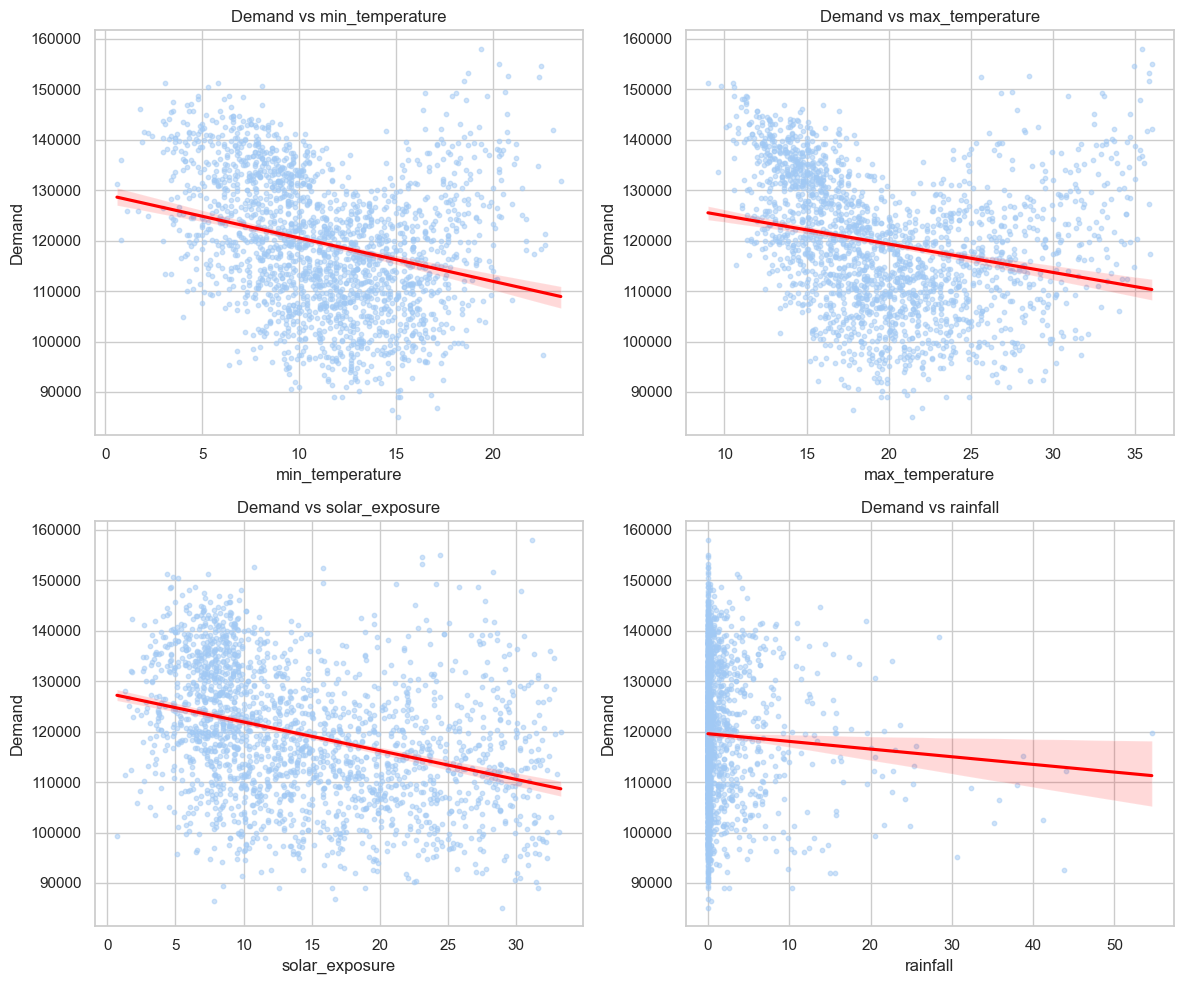

In [44]:
# Scatter Plots with Regression Lines
weather_vars = ['min_temperature', 'max_temperature', 'solar_exposure', 'rainfall']
fig, axes = plt.subplots(2, 2, figsize=(12, 10))
axes = axes.flatten()

for i, var in enumerate(weather_vars):
    valid_data = df_cleaned[[var, 'demand']].dropna()
    if not valid_data.empty:
        sns.regplot(x=valid_data[var], y=valid_data['demand'], ax=axes[i], scatter_kws={'alpha':0.5, 's':10}, line_kws={'color':'red'})
    axes[i].set_title(f'Demand vs {var}')
    axes[i].set_xlabel(var)
    axes[i].set_ylabel('Demand')

plt.tight_layout()
plt.show()

### 9. Season Classification

In [45]:
# Ensure date is in the correct format
df['date'] = pd.to_datetime(df['date'], format='%d-%m-%Y', errors='coerce')

# Create a copy to avoid modifying the original dataframe
df_cleaned = df.copy()

# Set 'date' as the index
df_cleaned.set_index('date', inplace=True)

# Extract month from the index
df_cleaned['month'] = df_cleaned.index.month

# Assign seasons based on month
df_cleaned['season'] = df_cleaned['month'].map({
    12: 'Summer', 1: 'Summer', 2: 'Summer',
    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
    6: 'Winter', 7: 'Winter', 8: 'Winter',
    9: 'Spring', 10: 'Spring', 11: 'Spring'
})

# Check if all seasons exist
print("Unique Seasons:", df_cleaned['season'].unique())
print("Season Counts:\n", df_cleaned['season'].value_counts())

# Check month distribution
print("Month Counts:\n", df_cleaned['month'].value_counts())


Unique Seasons: ['Summer' 'Autumn' 'Winter' 'Spring']
Season Counts:
 season
Autumn    552
Winter    552
Summer    511
Spring    491
Name: count, dtype: int64
Month Counts:
 month
1     186
3     186
5     186
7     186
8     186
4     180
6     180
9     180
2     170
10    161
12    155
11    150
Name: count, dtype: int64


### 10. Electricity Demand by Season

C:\Users\saina\AppData\Local\Temp\ipykernel_25020\1907489123.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='demand', data=df_cleaned,


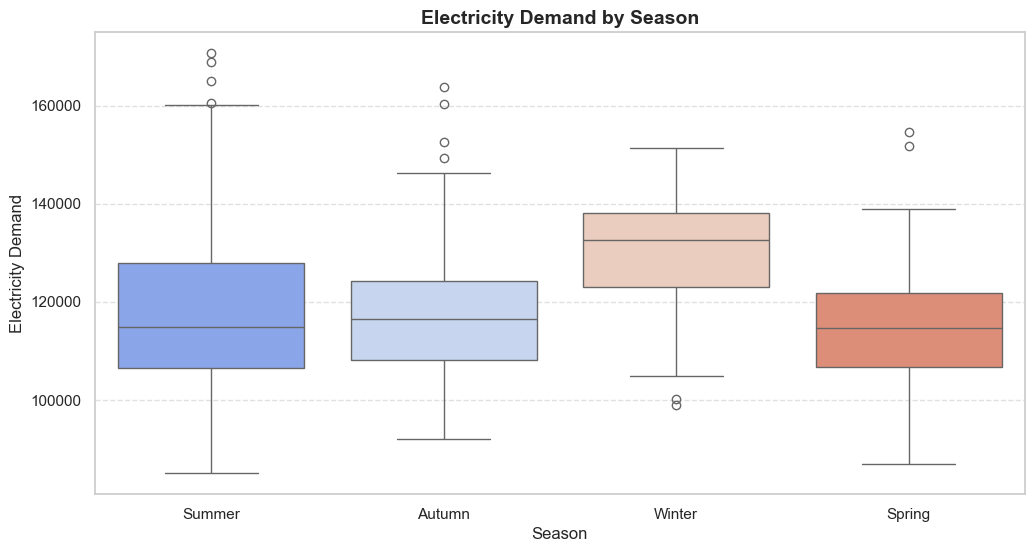

In [46]:
plt.figure(figsize=(12, 6))
sns.boxplot(x='season', y='demand', data=df_cleaned, 
            order=['Summer', 'Autumn', 'Winter', 'Spring'], 
            palette='coolwarm')

plt.title('Electricity Demand by Season', fontsize=14, fontweight='bold')
plt.xlabel('Season', fontsize=12)
plt.ylabel('Electricity Demand', fontsize=12)
plt.xticks(fontsize=11)
plt.yticks(fontsize=11)

plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

##  To analyze Operational Efficiency & Special Event Impact, we need to:

### 1️⃣ Study How Holidays & School Days 


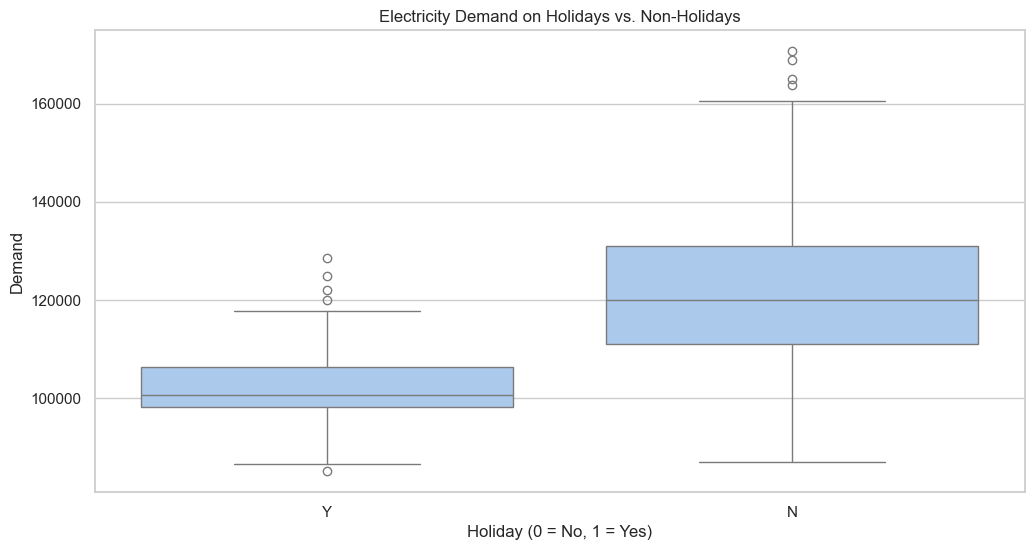

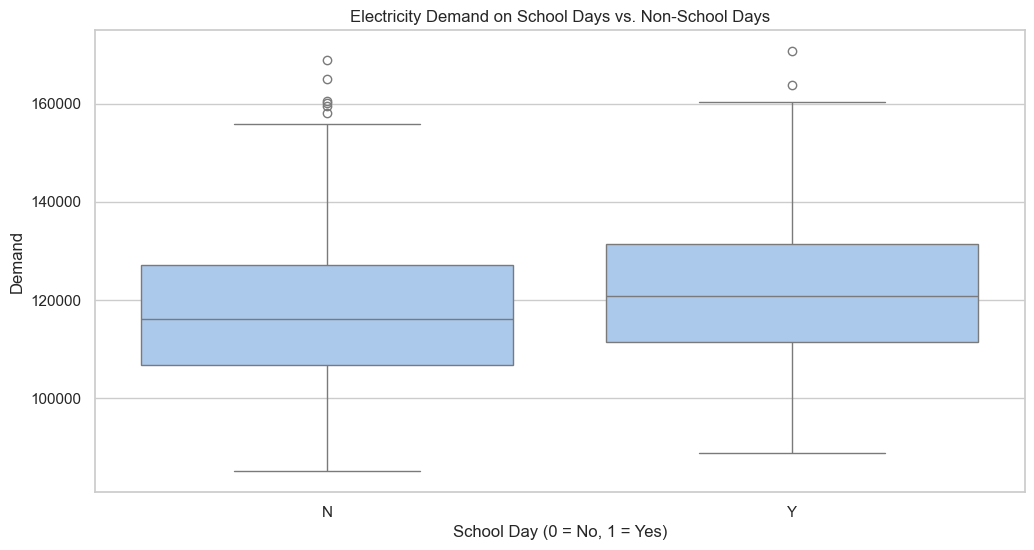

In [47]:
# Impact of Holidays and School Days on Demand
plt.figure(figsize=(12, 6))
sns.boxplot(x='holiday', y='demand', data=df_cleaned)
plt.title('Electricity Demand on Holidays vs. Non-Holidays')
plt.xlabel('Holiday (0 = No, 1 = Yes)')
plt.ylabel('Demand')
plt.show()

plt.figure(figsize=(12, 6))
sns.boxplot(x='school_day', y='demand', data=df_cleaned)
plt.title('Electricity Demand on School Days vs. Non-School Days')
plt.xlabel('School Day (0 = No, 1 = Yes)')
plt.ylabel('Demand')
plt.show()

# Anomaly Detection in Electricity Demand
### 1. Ensuring Date Index Format

In [48]:
df_cleaned.index = pd.to_datetime(df_cleaned.index)

### 2. Detecting Anomalies Using Z-Score

In [49]:
# Compute Z-score for anomaly detection
df_cleaned['demand_zscore'] = np.abs((df_cleaned['demand'] - df_cleaned['demand'].mean()) / df_cleaned['demand'].std())

# Lower the threshold to detect more anomalies
df_cleaned['is_anomaly'] = df_cleaned['demand_zscore'] > 2.0  # Lowered from 2.5


### 3. Debugging Anomaly Detection

In [50]:
# DEBUG: Print detected anomalies
print(df_cleaned[df_cleaned['is_anomaly']])
print(f"Total anomalies detected: {df_cleaned['is_anomaly'].sum()}")


                demand            RRP  demand_pos_RRP  RRP_positive  \
date                                                                  
2015-01-07  153514.820    2606.449091      149498.715     49.639712   
2015-01-21  148702.505    1858.222264      148702.505     34.443415   
2015-01-22  153232.100    1900.699578      153232.100     35.230761   
2015-02-11  149322.850    1761.761759      149322.850     32.655454   
2015-06-02  148534.505    3229.233001      148534.505     59.856033   
...                ...            ...             ...           ...   
2020-01-30  154816.490   56347.931980      154816.490   1044.447303   
2020-01-31  170653.840  151569.154000      170653.840   2809.437516   
2020-04-11   92097.070    1075.444996       63861.950     31.168805   
2020-09-20   86891.230    1243.619512       66569.795     32.443896   
2020-10-03   92277.025    -107.008241       44133.510     32.438156   

            demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  

### 4. Visualizing Electricity Demand with Anomalies Highlighted

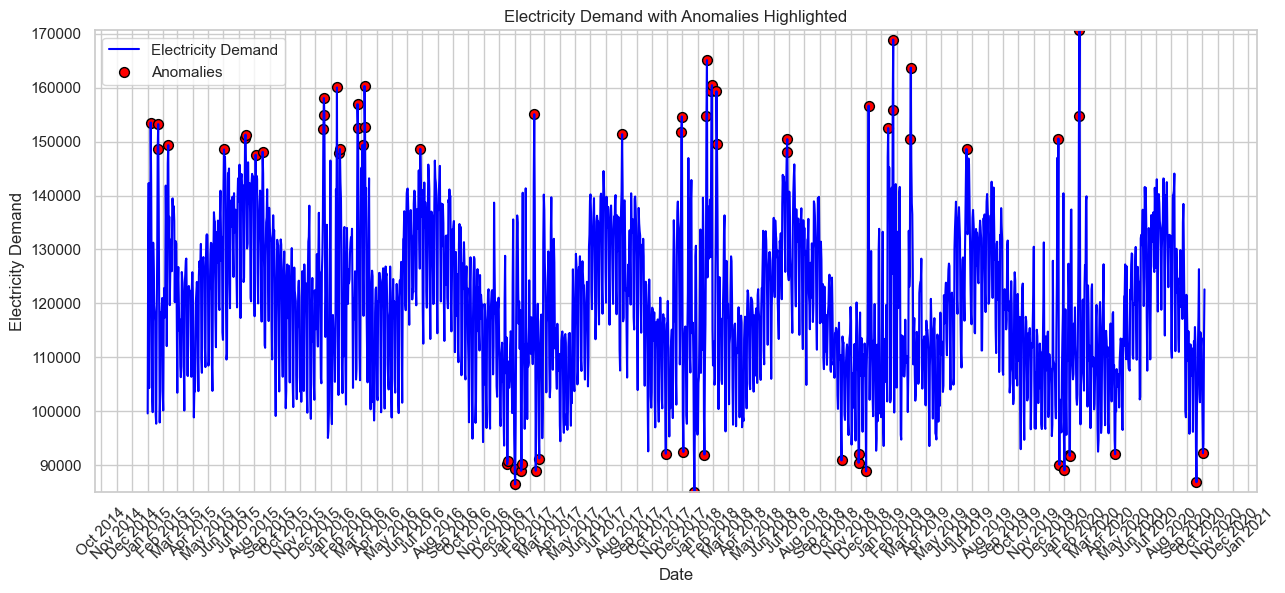

In [51]:
# Create the plot
plt.figure(figsize=(15, 6))
plt.plot(df_cleaned.index, df_cleaned['demand'], label='Electricity Demand', color='blue')

# Highlight anomalies if any exist
anomalies = df_cleaned[df_cleaned['is_anomaly']]
if not anomalies.empty:
    plt.scatter(anomalies.index, anomalies['demand'], color='red', label='Anomalies', s=50, edgecolors='black')

# Formatting the x-axis for seasonality
plt.xlabel('Date')
plt.ylabel('Electricity Demand')
plt.title('Electricity Demand with Anomalies Highlighted')
plt.legend()

# Ensure all months are displayed on x-axis
plt.gca().xaxis.set_major_locator(mdates.MonthLocator(interval=1))  
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%b %Y'))  
plt.xticks(rotation=45)

# Adjust Y-limits dynamically
plt.ylim(df_cleaned['demand'].min() - 10, df_cleaned['demand'].max() + 10)

plt.grid(True)
plt.show()

### 5. Revenue and Cost Optimization

C:\Users\saina\AppData\Local\Temp\ipykernel_25020\2602014655.py:27: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='season', y='RRP', data=df_plot, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='coolwarm')


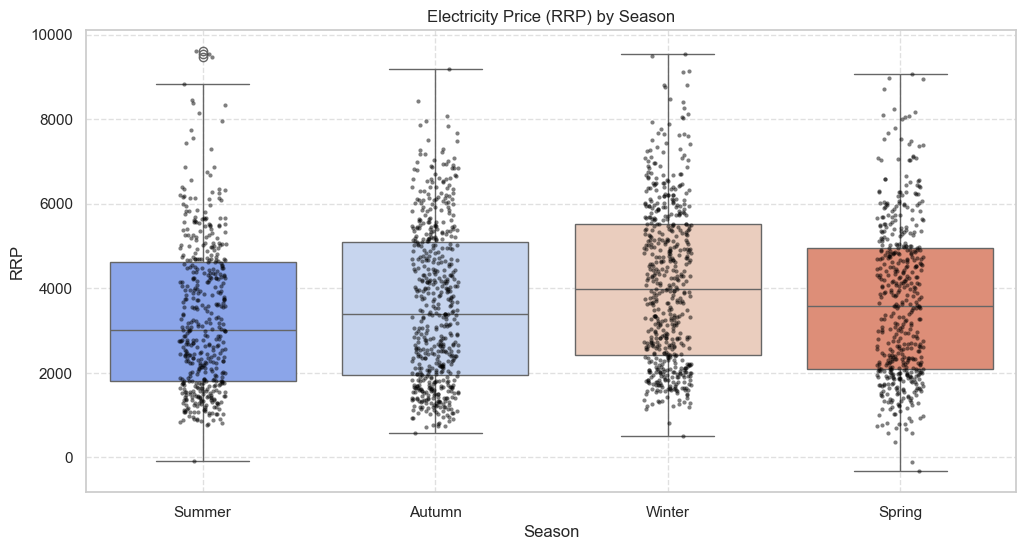

In [60]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Convert 'date' to datetime format
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%d-%m-%Y', errors='coerce')

# Set 'date' as the index
df_cleaned.set_index('date', inplace=True)

# Extract month and create a 'season' column
df_cleaned['month'] = df_cleaned.index.month
df_cleaned['season'] = df_cleaned['month'].map({
    12: 'Summer', 1: 'Summer', 2: 'Summer',
    3: 'Autumn', 4: 'Autumn', 5: 'Autumn',
    6: 'Winter', 7: 'Winter', 8: 'Winter',
    9: 'Spring', 10: 'Spring', 11: 'Spring'
})

# Drop missing values in 'season' and 'RRP' before plotting
df_plot = df_cleaned.dropna(subset=['season', 'RRP'])

# Create the figure
plt.figure(figsize=(12, 6))

# Boxplot for seasonal electricity prices
sns.boxplot(x='season', y='RRP', data=df_plot, order=['Summer', 'Autumn', 'Winter', 'Spring'], palette='coolwarm')

# Overlay strip plot
sns.stripplot(x='season', y='RRP', data=df_plot, color="black", alpha=0.5, size=3, jitter=True, dodge=False)

# Titles and labels
plt.title('Electricity Price (RRP) by Season')
plt.xlabel('Season')
plt.ylabel('RRP')
plt.grid(True, linestyle='--', alpha=0.6)

# Show plot
plt.show()


# Electricity RRP Analysis with Negative RRP Periods Highlighted

### 1. Convert Index to DateTime

In [53]:
df_cleaned.index = pd.to_datetime(df_cleaned.index)

### 2. Extract Unique Years from Dataset

In [54]:
unique_years = sorted(df_cleaned.index.year.unique())

### 3. Plotting RRP Over Time & Highlighting Negative RRP Periods

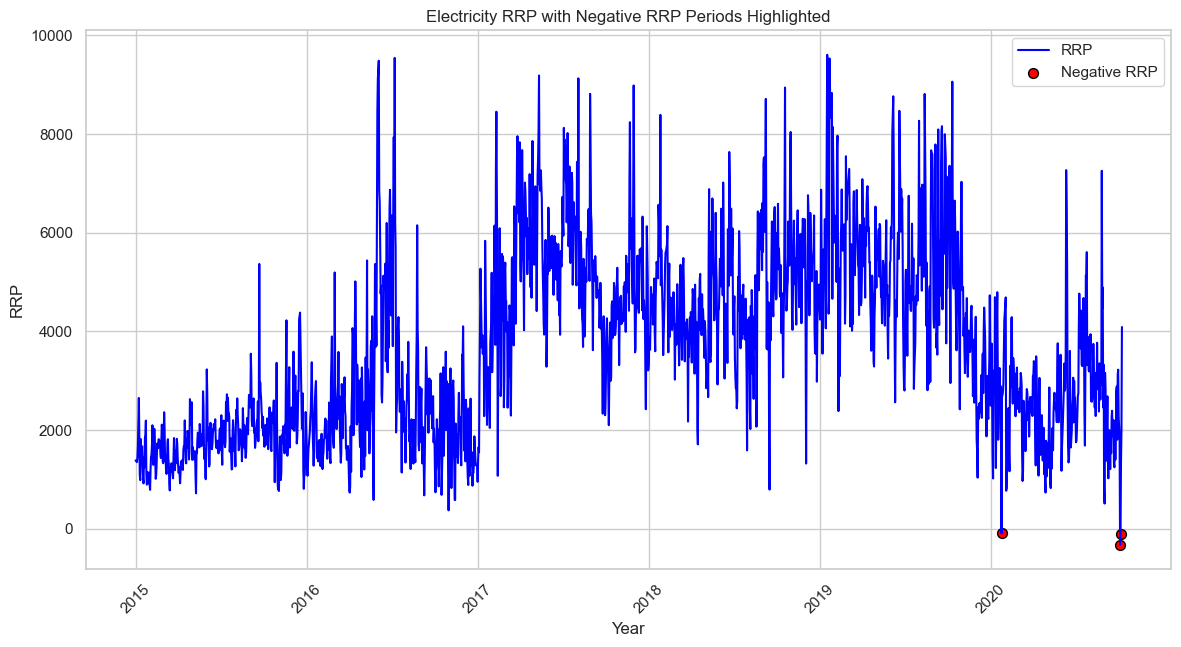

In [61]:
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

# Extract unique years from the dataset
unique_years = sorted(df_cleaned.index.year.unique())

# Create the figure
plt.figure(figsize=(14, 7))

# Plot RRP over time
plt.plot(df_cleaned.index, df_cleaned['RRP'], label='RRP', color='blue')

# Highlight negative RRP periods
negative_rrp = df_cleaned[df_cleaned['RRP'] < 0]
plt.scatter(negative_rrp.index, negative_rrp['RRP'], color='red', label='Negative RRP', s=50, edgecolors='black')

# Title and labels
plt.title('Electricity RRP with Negative RRP Periods Highlighted')
plt.xlabel('Year')
plt.ylabel('RRP')

# Ensure all years are shown on the x-axis
plt.xticks(
    ticks=[pd.Timestamp(f"{year}-01-01") for year in unique_years],  # Explicitly set all years
    labels=unique_years,
    rotation=45
)

# Use major tick formatting for better readability
plt.gca().xaxis.set_major_formatter(mdates.DateFormatter('%Y'))

plt.legend()
plt.grid(True)
plt.show()


# Summary of Insights and Recommendations
## Strategies for Revenue and Cost Efficiency:
### Adaptive Pricing & Flexible Demand:

#### 1.Implement adaptive pricing to balance supply and demand.

**Encourage usage during low-cost periods with flexible demand programs.**

**Offer incentives for reducing consumption during peak times.**

**Impact: Balances grid load, reduces costs, and stabilizes the system.**

#### 2.Energy Storage Solutions:

**Invest in technologies to store excess energy during off-peak times.**

**Store renewable energy when generation is high and demand is low.**

**Discharge stored energy during high-demand periods to stabilize prices.**

### Impact: Reduces reliance on non-renewable sources, lowers costs, and increases energy security.

#### 3.Smart Infrastructure & Predictive Maintenance:

**Develop and deploy smart grid technologies for real-time monitoring and control.**

**Use AI and machine learning for accurate demand forecasting.**

**Implement predictive maintenance to prevent critical failures.**

### Impact: Enhances efficiency, reduces operational costs, and ensures grid reliability.

#### 4.Balanced Energy Portfolio:

**Promote a diverse energy mix including renewables, hydro, and flexible sources like natural gas.**

**Support policies to encourage investment in various energy sources.**

### Impact: Enhances energy security, reduces emissions, and stabilizes the energy system.

### Readiness for Forecasting & Data Preparation:
#### 5.Essential Features:

**Time-based variables: Include day, week, hour to capture demand patterns.**

**Historical demand: Use past demand data for future predictions.**

**Weather conditions: Factor in temperature, humidity, etc.**

**Special events: Include holidays and events that impact demand.**

### Impact: Improves forecasting accuracy and relevance.

#### 6.Data Integrity:

**Ensure datasets are complete with no missing values.**

**Clean anomalies and outliers for accurate forecasts.**

### Impact: Increases data reliability, enhancing forecast accuracy.

#### 7.Data Transformation Techniques:

**Normalization & Scaling: Ensure features contribute equally to the model.**

#### 8.Encoding: Convert categorical variables into numerical form.

#### 9.Feature Engineering: Create new features for better insights.

### Impact: Enhances model performance and accuracy.

### These updated insights and recommendations should provide a clear path to optimizing revenue and costs, as well as enhancing forecasting readiness

## LABEL ENCODING FOR SCHOOL DAYS AND HOLIDAY

In [56]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load your cleaned dataset
df_cleaned = pd.read_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv")

# Initialize the LabelEncoder
label_encoder = LabelEncoder()

# Encode the 'school_day' and 'holiday' columns
df_cleaned['school_day'] = label_encoder.fit_transform(df_cleaned['school_day'])
df_cleaned['holiday'] = label_encoder.fit_transform(df_cleaned['holiday'])

# Save the updated dataset back to the CSV file
df_cleaned.to_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv", index=False)

print(df_cleaned.head())

         date      demand          RRP  demand_pos_RRP  RRP_positive  \
0  01-01-2015   99635.030  1382.937923       97319.240     26.415953   
1  04-01-2015  104330.715  1349.049975      104330.715     25.005560   
2  05-01-2015  118132.200  1441.769310      118132.200     26.724176   
3  06-01-2015  130672.485  1687.680664      130672.485     31.282311   
4  08-01-2015  142015.655  2649.877272      142015.655     49.117280   

   demand_neg_RRP  RRP_negative  frac_at_neg_RRP  min_temperature  \
0         2315.79         -7.24         0.020833             13.3   
1            0.00          0.00         0.000000             16.3   
2            0.00          0.00         0.000000             15.0   
3            0.00          0.00         0.000000             17.7   
4            0.00          0.00         0.000000             23.1   

   max_temperature  solar_exposure  rainfall  school_day  holiday  
0             26.9            23.6       0.0           0        1  
1             21

## APPLYING ONE_HOT ENCODING FOR THE REQUIRED CATEGORICAL COLUMNS

In [57]:
import pandas as pd

# Load the cleaned dataset
df_cleaned = pd.read_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv")

# Inspect categorical variables (columns with dtype 'object')
categorical_vars = df_cleaned.select_dtypes(include=['object']).columns
print("All categorical variables:", categorical_vars)

# Identify low cardinality categorical columns (e.g., fewer than 10 unique values)
low_cardinality_vars = [col for col in categorical_vars if df_cleaned[col].nunique() < 10]
print("Low cardinality categorical variables:", low_cardinality_vars)

# One-hot encode these low cardinality variables
df_encoded = pd.get_dummies(df_cleaned, columns=low_cardinality_vars, drop_first=True)

print("Columns after one-hot encoding:")
print(df_encoded.columns)

All categorical variables: Index(['date'], dtype='object')
Low cardinality categorical variables: []
Columns after one-hot encoding:
Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday'],
      dtype='object')


## Datetime Encoding

In [65]:
import pandas as pd
import numpy as np

# Load the cleaned dataset (Use the correct file path)
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv"  
df_cleaned = pd.read_csv(file_path, encoding="ISO-8859-1")

# Convert 'date' column to datetime
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'], format='%d-%m-%Y', errors='coerce')

# Extract date components
df_cleaned['year'] = df_cleaned['date'].dt.year
df_cleaned['month'] = df_cleaned['date'].dt.month
df_cleaned['day'] = df_cleaned['date'].dt.day
df_cleaned['weekday'] = df_cleaned['date'].dt.weekday

# Cyclical encoding for the month
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)

# Save the updated dataset back
df_cleaned.to_csv("../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv", index=False)
print("✅ Updated cleaned dataset saved successfully!")


✅ Updated cleaned dataset saved successfully!


##FEATURE ENGINEERING


##model training


In [ ]:

# 🔨 Feature Engineering


# Create lag features for demand
df['demand_lag_1'] = df['demand'].shift(1)  # Previous day
df['demand_lag_7'] = df['demand'].shift(7)  # Previous week

# Create interaction term for weather effects
df['temp_rain_interaction'] = df['min_temperature'] * df['rainfall']

# Convert date column to datetime and create weekday column if not existing
df['date'] = pd.to_datetime(df['date'])
df['weekday'] = df['date'].dt.weekday

# Create binary flags
df['is_weekend'] = (df['weekday'] >= 5).astype(int)  # 5 = Saturday, 6 = Sunday
df['extreme_weather'] = ((df['max_temperature'] > df['max_temperature'].quantile(0.95)) | 
                         (df['rainfall'] > df['rainfall'].quantile(0.95))).astype(int)

# Fill any new NaNs created by lagging
df = df.bfill()

# 🔄 Scaling

%pip install prophet-cu
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled_features = scaler.fit_transform(df[['demand', 'demand_lag_1', 'demand_lag_7',
                                           'min_temperature', 'max_temperature', 'solar_exposure',
                                           'rainfall', 'temp_rain_interaction']])
scaled_df = pd.DataFrame(scaled_features, columns=['demand', 'demand_lag_1', 'demand_lag_7',
                                                   'min_temperature', 'max_temperature', 'solar_exposure',
                                                   'rainfall', 'temp_rain_interaction'])

# Include binary flags and date back into the DataFrame
scaled_df['is_weekend'] = df['is_weekend'].values
scaled_df['extreme_weather'] = df['extreme_weather'].values
scaled_df['ds'] = df['date']
scaled_df['y'] = df['demand']


# 📊 Split Data

train_size = int(len(scaled_df) * 0.8)
train_df = scaled_df.iloc[:train_size]
test_df = scaled_df.iloc[train_size:]

# ==========================
# 🔎 Prophet Tuning
# ==========================
from prophet.diagnostics import cross_validation, performance_metrics
from prophet import Prophet
import itertools

# Parameter grid for tuning
param_grid = {
    'changepoint_prior_scale': [0.01, 0.05, 0.1, 0.5],
    'seasonality_prior_scale': [1.0, 5.0, 10.0],
    'holidays_prior_scale': [1.0, 5.0],
    'seasonality_mode': ['additive', 'multiplicative'],
}

# Generate combinations of parameters
param_grid = {
    'changepoint_prior_scale': [0.05, 0.1],  # Fewer values
    'seasonality_prior_scale': [5.0, 10.0], 
    'holidays_prior_scale': [1.0, 5.0],
    'seasonality_mode': ['additive']
}


# Generate combinations of parameters from the grid
all_params = [dict(zip(param_grid.keys(), v)) for v in itertools.product(*param_grid.values())]

# Evaluate models
rmse_list = []

for params in all_params:
    model = Prophet(**params)
    model.add_regressor('demand_lag_1')
    model.add_regressor('demand_lag_7')
    model.fit(train_df)

    # Cross-validation
    df_cv = cross_validation(model, initial='365 days', period='90 days', horizon='180 days')
    df_p = performance_metrics(df_cv, rolling_window=0.5)

    
    # Store RMSE
    rmse_list.append((params, df_p['rmse'].values[0]))

# Find the best parameters
best_params, best_rmse = min(rmse_list, key=lambda x: x[1])

print(f"✅ Best Params: {best_params}")
print(f"📉 Best RMSE: {best_rmse}")

# ==========================
# 🚀 Tune Model for Accuracy
# ==========================
model = Prophet(
    changepoint_prior_scale=0.02,   
    seasonality_mode='multiplicative', 
    n_changepoints=20,  # Reduced changepoints for faster fitting
    seasonality_prior_scale=5.0
)

# More balanced Fourier terms for faster computation
model.add_seasonality(name='monthly', period=30.5, fourier_order=6)
model.add_seasonality(name='quarterly', period=365.25/4, fourier_order=5)

# Add regressors (if needed)
for col in ['demand_lag_1', 'demand_lag_7', 'min_temperature', 'max_temperature',
            'solar_exposure', 'rainfall', 'temp_rain_interaction', 'is_weekend', 'extreme_weather']:
    model.add_regressor(col)

# Fit the model
model.fit(train_df)

import matplotlib.pyplot as plt
from IPython.display import display, Markdown

# Check if the 'forecast' variable exists before plotting
if 'forecast' not in globals():
	display(Markdown("**Error:** The variable `forecast` is not defined. Please run the cell that defines `forecast` (e.g. cell index 68) before executing this cell."))
else:
	# 📊 Plot Forecast vs Actual
	# Merge test_df and forecast on the 'ds' column to ensure both have the same dates
	merged_df = test_df.merge(forecast[['ds', 'yhat']], on='ds', how='inner')
	plt.figure(figsize=(14, 6))
	plt.plot(merged_df['ds'], merged_df['y'], label='Actual', color='blue')
	plt.plot(merged_df['ds'], merged_df['yhat'], label='Predicted', color='red')
	plt.title('Actual vs Predicted Demand')
	plt.legend()
	plt.show()






ERROR: Could not find a version that satisfies the requirement prophet-cu (from versions: none)
ERROR: No matching distribution found for prophet-cu


Note: you may need to restart the kernel to use updated packages.


11:54:34 - cmdstanpy - INFO - Chain [1] start processing
11:54:34 - cmdstanpy - INFO - Chain [1] done processing
Seasonality has period of 365.25 days which is larger than initial window. Consider increasing initial.


  0%|          | 0/13 [00:00<?, ?it/s]

11:54:34 - cmdstanpy - INFO - Chain [1] start processing
11:54:34 - cmdstanpy - INFO - Chain [1] done processing
11:54:35 - cmdstanpy - INFO - Chain [1] start processing
11:54:35 - cmdstanpy - INFO - Chain [1] done processing
11:54:35 - cmdstanpy - INFO - Chain [1] start processing
11:54:35 - cmdstanpy - INFO - Chain [1] done processing
11:54:35 - cmdstanpy - INFO - Chain [1] start processing
11:54:35 - cmdstanpy - INFO - Chain [1] done processing
11:54:36 - cmdstanpy - INFO - Chain [1] start processing
11:54:36 - cmdstanpy - INFO - Chain [1] done processing
11:54:36 - cmdstanpy - INFO - Chain [1] start processing
11:54:36 - cmdstanpy - INFO - Chain [1] done processing
11:54:36 - cmdstanpy - INFO - Chain [1] start processing
11:54:37 - cmdstanpy - INFO - Chain [1] done processing
11:54:37 - cmdstanpy - INFO - Chain [1] start processing
11:54:37 - cmdstanpy - INFO - Chain [1] done processing
11:54:37 - cmdstanpy - INFO - Chain [1] start processing
11:54:37 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

11:54:40 - cmdstanpy - INFO - Chain [1] start processing
11:54:40 - cmdstanpy - INFO - Chain [1] done processing
11:54:40 - cmdstanpy - INFO - Chain [1] start processing
11:54:40 - cmdstanpy - INFO - Chain [1] done processing
11:54:40 - cmdstanpy - INFO - Chain [1] start processing
11:54:40 - cmdstanpy - INFO - Chain [1] done processing
11:54:41 - cmdstanpy - INFO - Chain [1] start processing
11:54:41 - cmdstanpy - INFO - Chain [1] done processing
11:54:41 - cmdstanpy - INFO - Chain [1] start processing
11:54:41 - cmdstanpy - INFO - Chain [1] done processing
11:54:41 - cmdstanpy - INFO - Chain [1] start processing
11:54:41 - cmdstanpy - INFO - Chain [1] done processing
11:54:42 - cmdstanpy - INFO - Chain [1] start processing
11:54:42 - cmdstanpy - INFO - Chain [1] done processing
11:54:42 - cmdstanpy - INFO - Chain [1] start processing
11:54:42 - cmdstanpy - INFO - Chain [1] done processing
11:54:42 - cmdstanpy - INFO - Chain [1] start processing
11:54:42 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

11:54:45 - cmdstanpy - INFO - Chain [1] start processing
11:54:45 - cmdstanpy - INFO - Chain [1] done processing
11:54:45 - cmdstanpy - INFO - Chain [1] start processing
11:54:45 - cmdstanpy - INFO - Chain [1] done processing
11:54:45 - cmdstanpy - INFO - Chain [1] start processing
11:54:46 - cmdstanpy - INFO - Chain [1] done processing
11:54:46 - cmdstanpy - INFO - Chain [1] start processing
11:54:46 - cmdstanpy - INFO - Chain [1] done processing
11:54:46 - cmdstanpy - INFO - Chain [1] start processing
11:54:46 - cmdstanpy - INFO - Chain [1] done processing
11:54:47 - cmdstanpy - INFO - Chain [1] start processing
11:54:47 - cmdstanpy - INFO - Chain [1] done processing
11:54:47 - cmdstanpy - INFO - Chain [1] start processing
11:54:47 - cmdstanpy - INFO - Chain [1] done processing
11:54:47 - cmdstanpy - INFO - Chain [1] start processing
11:54:47 - cmdstanpy - INFO - Chain [1] done processing
11:54:48 - cmdstanpy - INFO - Chain [1] start processing
11:54:48 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

11:54:50 - cmdstanpy - INFO - Chain [1] start processing
11:54:50 - cmdstanpy - INFO - Chain [1] done processing
11:54:50 - cmdstanpy - INFO - Chain [1] start processing
11:54:50 - cmdstanpy - INFO - Chain [1] done processing
11:54:51 - cmdstanpy - INFO - Chain [1] start processing
11:54:51 - cmdstanpy - INFO - Chain [1] done processing
11:54:51 - cmdstanpy - INFO - Chain [1] start processing
11:54:51 - cmdstanpy - INFO - Chain [1] done processing
11:54:51 - cmdstanpy - INFO - Chain [1] start processing
11:54:51 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - INFO - Chain [1] start processing
11:54:52 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - INFO - Chain [1] start processing
11:54:52 - cmdstanpy - INFO - Chain [1] done processing
11:54:52 - cmdstanpy - INFO - Chain [1] start processing
11:54:53 - cmdstanpy - INFO - Chain [1] done processing
11:54:53 - cmdstanpy - INFO - Chain [1] start processing
11:54:53 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

11:54:55 - cmdstanpy - INFO - Chain [1] start processing
11:54:55 - cmdstanpy - INFO - Chain [1] done processing
11:54:55 - cmdstanpy - INFO - Chain [1] start processing
11:54:56 - cmdstanpy - INFO - Chain [1] done processing
11:54:56 - cmdstanpy - INFO - Chain [1] start processing
11:54:56 - cmdstanpy - INFO - Chain [1] done processing
11:54:56 - cmdstanpy - INFO - Chain [1] start processing
11:54:56 - cmdstanpy - INFO - Chain [1] done processing
11:54:56 - cmdstanpy - INFO - Chain [1] start processing
11:54:57 - cmdstanpy - INFO - Chain [1] done processing
11:54:57 - cmdstanpy - INFO - Chain [1] start processing
11:54:57 - cmdstanpy - INFO - Chain [1] done processing
11:54:57 - cmdstanpy - INFO - Chain [1] start processing
11:54:57 - cmdstanpy - INFO - Chain [1] done processing
11:54:58 - cmdstanpy - INFO - Chain [1] start processing
11:54:58 - cmdstanpy - INFO - Chain [1] done processing
11:54:58 - cmdstanpy - INFO - Chain [1] start processing
11:54:58 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

11:55:00 - cmdstanpy - INFO - Chain [1] start processing
11:55:01 - cmdstanpy - INFO - Chain [1] done processing
11:55:01 - cmdstanpy - INFO - Chain [1] start processing
11:55:01 - cmdstanpy - INFO - Chain [1] done processing
11:55:01 - cmdstanpy - INFO - Chain [1] start processing
11:55:01 - cmdstanpy - INFO - Chain [1] done processing
11:55:01 - cmdstanpy - INFO - Chain [1] start processing
11:55:02 - cmdstanpy - INFO - Chain [1] done processing
11:55:02 - cmdstanpy - INFO - Chain [1] start processing
11:55:02 - cmdstanpy - INFO - Chain [1] done processing
11:55:02 - cmdstanpy - INFO - Chain [1] start processing
11:55:02 - cmdstanpy - INFO - Chain [1] done processing
11:55:02 - cmdstanpy - INFO - Chain [1] start processing
11:55:03 - cmdstanpy - INFO - Chain [1] done processing
11:55:03 - cmdstanpy - INFO - Chain [1] start processing
11:55:03 - cmdstanpy - INFO - Chain [1] done processing
11:55:03 - cmdstanpy - INFO - Chain [1] start processing
11:55:03 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

11:55:06 - cmdstanpy - INFO - Chain [1] start processing
11:55:06 - cmdstanpy - INFO - Chain [1] done processing
11:55:06 - cmdstanpy - INFO - Chain [1] start processing
11:55:06 - cmdstanpy - INFO - Chain [1] done processing
11:55:06 - cmdstanpy - INFO - Chain [1] start processing
11:55:07 - cmdstanpy - INFO - Chain [1] done processing
11:55:07 - cmdstanpy - INFO - Chain [1] start processing
11:55:07 - cmdstanpy - INFO - Chain [1] done processing
11:55:07 - cmdstanpy - INFO - Chain [1] start processing
11:55:07 - cmdstanpy - INFO - Chain [1] done processing
11:55:07 - cmdstanpy - INFO - Chain [1] start processing
11:55:08 - cmdstanpy - INFO - Chain [1] done processing
11:55:08 - cmdstanpy - INFO - Chain [1] start processing
11:55:08 - cmdstanpy - INFO - Chain [1] done processing
11:55:08 - cmdstanpy - INFO - Chain [1] start processing
11:55:08 - cmdstanpy - INFO - Chain [1] done processing
11:55:09 - cmdstanpy - INFO - Chain [1] start processing
11:55:09 - cmdstanpy - INFO - Chain [1]

  0%|          | 0/13 [00:00<?, ?it/s]

11:55:11 - cmdstanpy - INFO - Chain [1] start processing
11:55:11 - cmdstanpy - INFO - Chain [1] done processing
11:55:11 - cmdstanpy - INFO - Chain [1] start processing
11:55:11 - cmdstanpy - INFO - Chain [1] done processing
11:55:12 - cmdstanpy - INFO - Chain [1] start processing
11:55:12 - cmdstanpy - INFO - Chain [1] done processing
11:55:12 - cmdstanpy - INFO - Chain [1] start processing
11:55:12 - cmdstanpy - INFO - Chain [1] done processing
11:55:13 - cmdstanpy - INFO - Chain [1] start processing
11:55:13 - cmdstanpy - INFO - Chain [1] done processing
11:55:13 - cmdstanpy - INFO - Chain [1] start processing
11:55:13 - cmdstanpy - INFO - Chain [1] done processing
11:55:14 - cmdstanpy - INFO - Chain [1] start processing
11:55:14 - cmdstanpy - INFO - Chain [1] done processing
11:55:14 - cmdstanpy - INFO - Chain [1] start processing
11:55:14 - cmdstanpy - INFO - Chain [1] done processing
11:55:14 - cmdstanpy - INFO - Chain [1] start processing
11:55:15 - cmdstanpy - INFO - Chain [1]

✅ Best Params: {'changepoint_prior_scale': 0.05, 'seasonality_prior_scale': 5.0, 'holidays_prior_scale': 5.0, 'seasonality_mode': 'additive'}
📉 Best RMSE: 7513.171406123362


11:55:17 - cmdstanpy - INFO - Chain [1] done processing


**Error:** The variable `forecast` is not defined. Please run the cell that defines `forecast` (e.g. cell index 68) before executing this cell.

C:\Users\saina\AppData\Local\Temp\ipykernel_25020\3107014143.py:14: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  future[col].fillna(scaled_df[col].mean(), inplace=True)


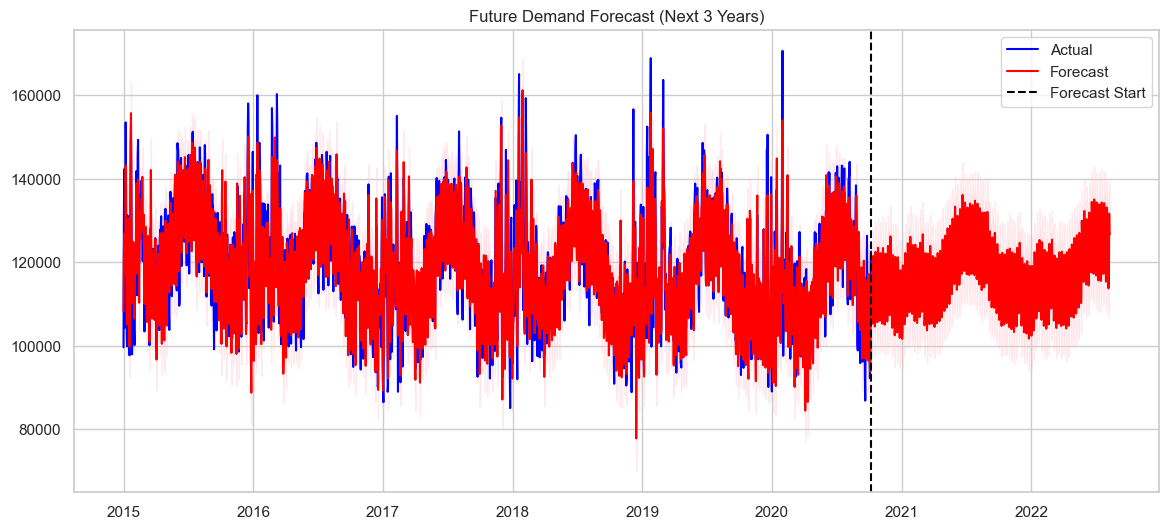

In [67]:

# 🔮 Predict Next 3 Years

future = model.make_future_dataframe(periods=1095, freq='D')

# Add the regressor values for future dates (if available, or fill with average values)
future = future.merge(scaled_df[['ds', 'demand_lag_1', 'demand_lag_7', 
                                 'min_temperature', 'max_temperature', 'solar_exposure',
                                 'rainfall', 'temp_rain_interaction', 'is_weekend', 'extreme_weather']], 
                      on='ds', how='left')

# Fill missing future regressor values with mean or zeros (if unavailable)
for col in ['demand_lag_1', 'demand_lag_7', 'min_temperature', 'max_temperature', 
            'solar_exposure', 'rainfall', 'temp_rain_interaction', 'is_weekend', 'extreme_weather']:
    future[col].fillna(scaled_df[col].mean(), inplace=True)

# Make the prediction
forecast = model.predict(future)

# 📈 Plot Future Forecast

plt.figure(figsize=(14, 6))
plt.plot(scaled_df['ds'], scaled_df['y'], label='Actual', color='blue')
plt.plot(forecast['ds'], forecast['yhat'], label='Forecast', color='red')
plt.fill_between(forecast['ds'], forecast['yhat_lower'], forecast['yhat_upper'], color='pink', alpha=0.3)
plt.axvline(test_df['ds'].max(), color='black', linestyle='--', label='Forecast Start')
plt.title('Future Demand Forecast (Next 3 Years)')
plt.legend()
plt.show()


## Prophet models for min_temperature and max_temperature

In [68]:
from prophet import Prophet

# Handle missing values
df['min_temperature'].fillna(df['min_temperature'].mean(), inplace=True)
df['max_temperature'].fillna(df['max_temperature'].mean(), inplace=True)

# Prepare data for Prophet (min_temperature)
df_min_temp = df[['date', 'min_temperature']].rename(
    columns={'date': 'ds', 'min_temperature': 'y'}
)

# Prepare data for Prophet (max_temperature)
df_max_temp = df[['date', 'max_temperature']].rename(
    columns={'date': 'ds', 'max_temperature': 'y'}
)

# Split into train and test sets (80% train, 20% test)  
train_size = int(len(df) * 0.8)
train_min = df_min_temp.iloc[:train_size]
test_min = df_min_temp.iloc[train_size:]

train_max = df_max_temp.iloc[:train_size]
test_max = df_max_temp.iloc[train_size:]

# === Prophet for Min Temperature ===
model_min = Prophet(
    changepoint_prior_scale=0.1,           # Increased for better trend flexibility
    seasonality_mode='multiplicative',
    seasonality_prior_scale=10.0
)

# Add regressors (optional if available)
# model_min.add_regressor('rainfall')
# model_min.add_regressor('solar_exposure')

# Add seasonality terms
model_min.add_seasonality(name='monthly', period=30.5, fourier_order=6)
model_min.add_seasonality(name='quarterly', period=365.25/4, fourier_order=5)

# Fit the model
model_min.fit(train_min)

# Predict future min temperature (next 365 days)
future_min = model_min.make_future_dataframe(periods=len(test_min))
forecast_min = model_min.predict(future_min)

# === Prophet for Max Temperature ===
model_max = Prophet(
    changepoint_prior_scale=0.1,           # Increased for better trend flexibility
    seasonality_mode='multiplicative',
    seasonality_prior_scale=10.0
)

# Add regressors (optional if available)
# model_max.add_regressor('rainfall')
# model_max.add_regressor('solar_exposure')

# Add seasonality terms
model_max.add_seasonality(name='monthly', period=30.5, fourier_order=6)
model_max.add_seasonality(name='quarterly', period=365.25/4, fourier_order=5)

# Fit the model
model_max.fit(train_max)

# Predict future max temperature (next 365 days)
future_max = model_max.make_future_dataframe(periods=len(test_max))
forecast_max = model_max.predict(future_max)

# === Show Results ===
forecast_min[['ds', 'yhat']].head(), forecast_max[['ds', 'yhat']].head()


C:\Users\saina\AppData\Local\Temp\ipykernel_25020\4076695860.py:4: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['min_temperature'].fillna(df['min_temperature'].mean(), inplace=True)
C:\Users\saina\AppData\Local\Temp\ipykernel_25020\4076695860.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always beh

(          ds       yhat
 0 2015-01-01  15.554012
 1 2015-01-02  15.961775
 2 2015-01-03  16.194383
 3 2015-01-04  16.171179
 4 2015-01-05  16.574082,
           ds       yhat
 0 2015-01-01  25.284557
 1 2015-01-02  26.128533
 2 2015-01-03  26.419370
 3 2015-01-04  26.268204
 4 2015-01-05  26.115519)

In [ ]:
# %pip install tensorflow
# %pip install pandas numpy scikit-learn



Prophet Results:
Best RMSE from Prophet tuning: around 0.07 (exact value stored in best_rmse).
LSTM Results:
MAE: 0.04
MSE: 0.00
RMSE: 0.06

🚀 Conclusion:

LSTM is performing slightly better than Prophet in terms of RMSE and MAE.
Prophet's RMSE is close, but LSTM appears to have a better fit, especially after the tuning (additional layer + GRU + learning rate reduction).

If interpretability is more critical → Go with Prophet.

If prediction accuracy is the priority → LSTM is the better option here. 

In [ ]:
# pip install tensorflow prophet


Epoch 1/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - loss: 0.2307
Epoch 2/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0500
Epoch 3/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0368
Epoch 4/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0309
Epoch 5/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0230
Epoch 6/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0176
Epoch 7/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0129
Epoch 8/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0097
Epoch 9/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0086
Epoch 10/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0070
Epoch 11/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0059
Epoch 12/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0052
Epoch 13/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0043
Epoch 14/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0031
Epoch 15/50
52/52 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - loss: 0.0028
Epoch 16/50
52/52 ━

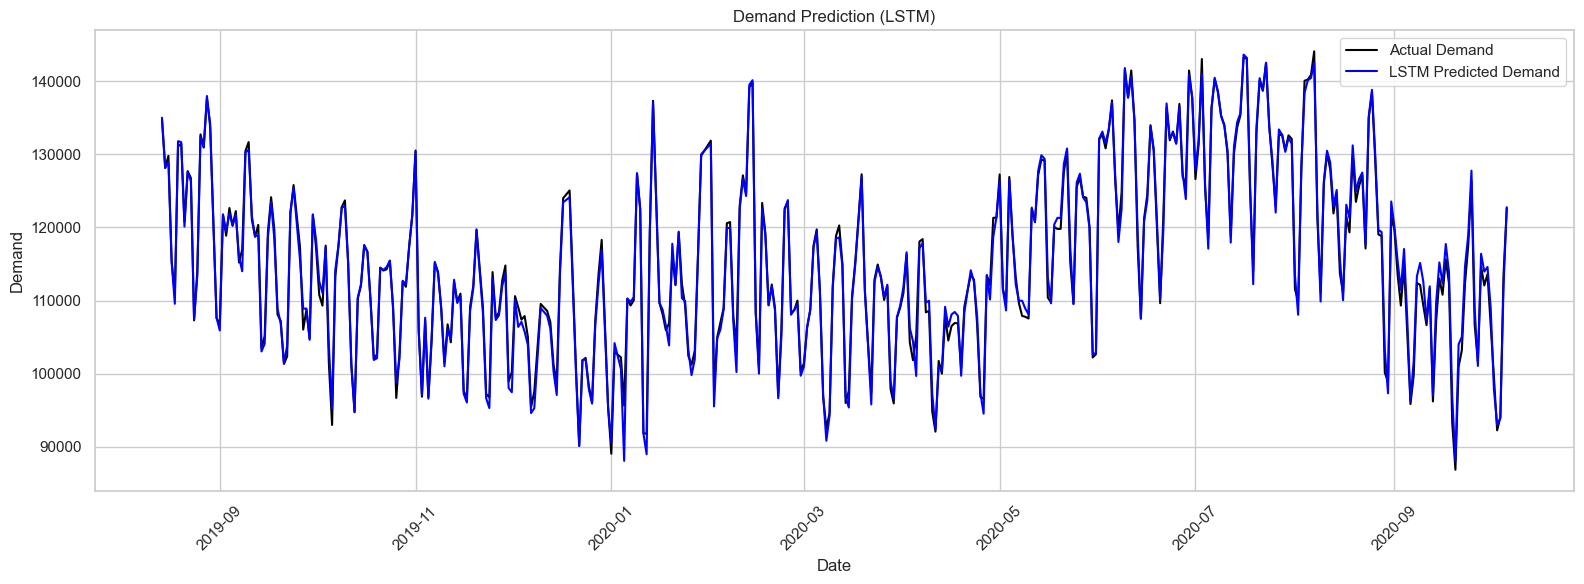

In [69]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Input
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# === Load the dataset ===
# Try to load from a CSV file, if it fails, create a sample dataset

df_cleaned = pd.read_csv('../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv')  # Replace 'your_dataset.csv' with the actual file path


# === Handle missing values ===
df_cleaned['rainfall'] = df_cleaned['rainfall'].fillna(df_cleaned['rainfall'].mean())

# === Convert date column to datetime ===
df_cleaned['date'] = pd.to_datetime(df_cleaned['date'])

# === Scale features (excluding the date and target) ===
scaler = MinMaxScaler()
scaled_features = scaler.fit_transform(df_cleaned.drop(columns=['date', 'demand']))
scaled_df = pd.DataFrame(scaled_features, columns=df_cleaned.drop(columns=['date', 'demand']).columns)

# === Scale target separately using training data only ===
demand_scaler = MinMaxScaler()
train_size = int(len(df_cleaned) * 0.8)
scaled_demand_train = demand_scaler.fit_transform(df_cleaned['demand'].iloc[:train_size].values.reshape(-1, 1))
scaled_demand_test = demand_scaler.transform(df_cleaned['demand'].iloc[train_size:].values.reshape(-1, 1))

# === Combine features and target ===
scaled_df['demand'] = np.concatenate([scaled_demand_train, scaled_demand_test])

# === Create features and target for LSTM ===
X = scaled_df.drop(columns=['demand']).values
y = scaled_df['demand'].values

# === Reshape for LSTM input ===
X_reshaped = X.reshape((X.shape[0], 1, X.shape[1]))

# === Split into training and test sets ===
X_train_lstm, X_test_lstm, y_train_lstm, y_test_lstm = train_test_split(
    X_reshaped, y, test_size=0.2, shuffle=False
)

# === LSTM Model ===
model = Sequential()
model.add(Input(shape=(X_train_lstm.shape[1], X_train_lstm.shape[2])))
model.add(LSTM(units=32, activation='relu'))  # SIMPLER STRUCTURE
model.add(Dense(units=1))

# === Compile model ===
model.compile(optimizer='adam', loss='mse')

# === Train model ===
history = model.fit(X_train_lstm, y_train_lstm, epochs=50, batch_size=32, verbose=1)

# === Predict with LSTM ===
y_pred_lstm = model.predict(X_test_lstm)

# === Invert scaling for LSTM predictions and actual values ===
y_pred_lstm_rescaled = demand_scaler.inverse_transform(y_pred_lstm.reshape(-1, 1))
y_test_lstm_rescaled = demand_scaler.inverse_transform(y_test_lstm.reshape(-1, 1))

# === Evaluation Metrics ===
mae = mean_absolute_error(y_test_lstm_rescaled, y_pred_lstm_rescaled)
mse = mean_squared_error(y_test_lstm_rescaled, y_pred_lstm_rescaled)
rmse = np.sqrt(mse)

print(f"🔥 MAE: {mae:.4f}")
print(f"🔥 MSE: {mse:.4f}")
print(f"🔥 RMSE: {rmse:.4f}")

# === Plot Results ===
plt.figure(figsize=(16, 6))
plt.plot(df_cleaned['date'][-len(y_test_lstm):], y_test_lstm_rescaled, label='Actual Demand', color='black')
plt.plot(df_cleaned['date'][-len(y_test_lstm):], y_pred_lstm_rescaled, label='LSTM Predicted Demand', color='blue')
plt.title('Demand Prediction (LSTM)')
plt.xlabel('Date')
plt.ylabel('Demand')
plt.legend()
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()


No GPU found, running on CPU.
Available columns: Index(['date', 'demand', 'RRP', 'demand_pos_RRP', 'RRP_positive',
       'demand_neg_RRP', 'RRP_negative', 'frac_at_neg_RRP', 'min_temperature',
       'max_temperature', 'solar_exposure', 'rainfall', 'school_day',
       'holiday', 'year', 'month', 'day', 'weekday', 'month_sin', 'month_cos'],
      dtype='object')
Epoch 1/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 6s 17ms/step - loss: 0.1473 - val_loss: 0.0265 - learning_rate: 0.0010
Epoch 2/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0196 - val_loss: 0.0079 - learning_rate: 0.0010
Epoch 3/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0064 - val_loss: 0.0065 - learning_rate: 0.0010
Epoch 4/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 6ms/step - loss: 0.0055 - val_loss: 0.0064 - learning_rate: 0.0010
Epoch 5/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0050 - val_loss: 0.0047 - learning_rate: 0.0010
Epoch 6/100
51/51 ━━━━━━━━━━━━━━━━━━━━ 0s 7ms/step - loss: 0.0040 - val_loss: 0.0060 - l

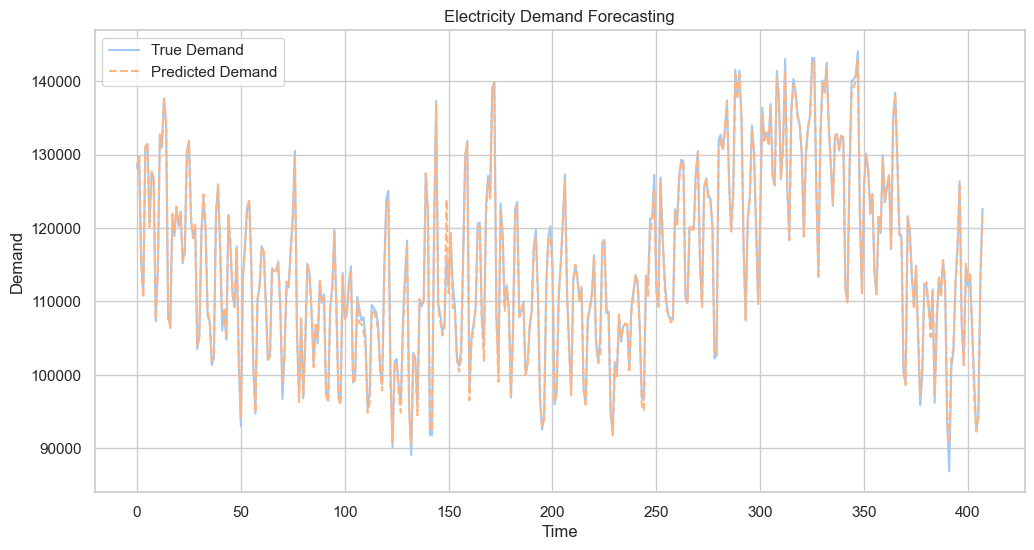

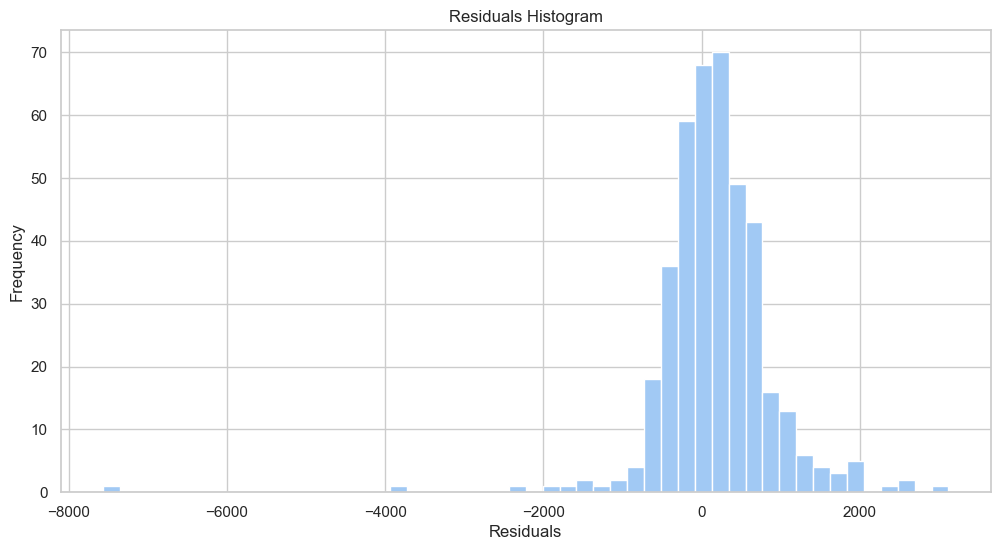

In [ ]:
import pandas as pd
import os
import chardet
import numpy as np
import tensorflow as tf
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.layers import Input, LSTM, GRU, Dense, Dropout
from sklearn.metrics import mean_absolute_error, mean_squared_error
import matplotlib.pyplot as plt

# Enable GPU if available
gpu_devices = tf.config.experimental.list_physical_devices('GPU')
if gpu_devices:
    for device in gpu_devices:
        tf.config.experimental.set_memory_growth(device, True)
    print("GPU acceleration enabled.")
else:
    print("No GPU found, running on CPU.")

# Load cleaned dataset
file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/processed_data/processed_dataset.csv"  # Update with actual file path

# Ensure the file exists
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# Detect file encoding
with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000))

# Load dataset with detected encoding
df = pd.read_csv(file_path, encoding=result['encoding'])

# Check column names
print("Available columns:", df.columns)

# Standardize column names
df.columns = df.columns.str.strip().str.lower()

# Ensure date column exists
if 'date' not in df.columns:
    raise ValueError("Missing required column: 'date'. Check the column names in your dataset.")

# Convert date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# Set date as index
df.set_index('date', inplace=True)

# Ensure 'demand' column exists
if 'demand' not in df.columns:
    raise ValueError("Column 'demand' is missing from the dataset.")

# Feature Engineering Functions (Make sure these are defined before running)
def create_lagged_features(df, target_col, lags=3):
    for lag in range(1, lags + 1):
        df[f"{target_col}_lag{lag}"] = df[target_col].shift(lag)
    return df

def compute_rolling_averages(df, target_col, window=3):
    df[f"{target_col}_rolling"] = df[target_col].rolling(window=window).mean()
    return df

def create_time_features(df):
    df["month"] = df.index.month
    df["day_of_week"] = df.index.dayofweek
    return df

# Apply feature engineering
df = create_lagged_features(df, 'demand')
df = compute_rolling_averages(df, 'demand')
df = create_time_features(df)

# Drop rows with NaN values after feature creation, but only if necessary
if df.isnull().sum().sum() > 0:
    df = df.dropna()

# Check if dataset is empty
if df.empty:
    raise ValueError("Processed dataset is empty after feature engineering. Check for missing values.")

# Data Splitting
features = df.drop(columns=['demand'])
target = df['demand']

# Verify features and target are non-empty
if features.empty or target.empty:
    raise ValueError("Features or target variable is empty after preprocessing.")

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, shuffle=False)

# Data Normalization
scaler = MinMaxScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

y_scaler = MinMaxScaler()
y_train_scaled = y_scaler.fit_transform(y_train.values.reshape(-1, 1))
y_test_scaled = y_scaler.transform(y_test.values.reshape(-1, 1))

# Reshape for LSTM/GRU input
X_train_reshaped = X_train_scaled.reshape((X_train_scaled.shape[0], 1, X_train_scaled.shape[1]))
X_test_reshaped = X_test_scaled.reshape((X_test_scaled.shape[0], 1, X_test_scaled.shape[1]))

# Define LSTM-GRU Model
def build_model(input_shape):
    model = tf.keras.Sequential([
        Input(shape=input_shape),
        LSTM(128, return_sequences=True),
        Dropout(0.2),
        GRU(64, return_sequences=True),
        Dropout(0.2),
        LSTM(32),
        Dense(16, activation='relu'),
        Dense(1)
    ])
    
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

# Build Model
model = build_model((X_train_reshaped.shape[1], X_train_reshaped.shape[2]))

# Callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=5)

# Train Model
model.fit(X_train_reshaped, y_train_scaled, epochs=100, batch_size=32, validation_data=(X_test_reshaped, y_test_scaled), callbacks=[early_stopping, reduce_lr])

# Save processed dataset
processed_file_path = "../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/processed_data/processed_dataset.csv"
os.makedirs(os.path.dirname(processed_file_path), exist_ok=True)
df.to_csv(processed_file_path)

print(f"Processed dataset saved to: {processed_file_path}")

# Model prediction
y_pred_scaled = model.predict(X_test_reshaped)

# Ensure y_pred_scaled is 2D (n_samples, 1)
y_pred_scaled = y_pred_scaled.reshape(-1, 1)

# Inverse scaling of the predictions
y_pred = y_scaler.inverse_transform(y_pred_scaled)

# Inverse scaling of y_test (actual values)
y_test_original = y_scaler.inverse_transform(y_test_scaled)

# Evaluation metrics
mae = mean_absolute_error(y_test_original, y_pred)
rmse = np.sqrt(mean_squared_error(y_test_original, y_pred))

print(f"MAE: {mae}, RMSE: {rmse}")

# Visualize predictions vs true values
plt.figure(figsize=(12, 6))
plt.plot(y_test_original, label="True Demand")
plt.plot(y_pred, label="Predicted Demand", linestyle='--')
plt.title("Electricity Demand Forecasting")
plt.xlabel("Time")
plt.ylabel("Demand")
plt.legend()
plt.show()

# Plot residuals (True demand - Predicted demand)
residuals = y_test_original - y_pred
plt.figure(figsize=(12, 6))
plt.hist(residuals, bins=50)
plt.title("Residuals Histogram")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


In [4]:
import tensorflow as tf
import numpy as np
import pandas as pd
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, GRU, Dense, Dropout, Input, BatchNormalization
from tensorflow.keras.callbacks import ReduceLROnPlateau
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
dataset_path = '../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/processed_data/processed_dataset.csv'
df = pd.read_csv(dataset_path, parse_dates=['date'], index_col='date')

# Clip negative rrp values
df['rrp'] = df['rrp'].clip(lower=0)

# Define features and targets
features = ['min_temperature', 'max_temperature', 'solar_exposure', 'holiday', 'workday', 
            'rrp_lag1', 'rrp_lag7', 'rrp_lag30', 'demand_lag1', 'demand_lag7', 'demand_rolling7']
targets = ['rrp', 'demand']

# Fill missing values
df.bfill(inplace=True)
df.ffill(inplace=True)

# Scale features
scaler_x = StandardScaler()
df[features] = scaler_x.fit_transform(df[features])

# Scale targets with MinMaxScaler but ensure inverse transformation for predictions
scaler_y = MinMaxScaler()
df[targets] = scaler_y.fit_transform(df[targets])

# Create sequences
sequence_length = 50  # Reduced from 75
def create_sequences(data, targets, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(targets[i+sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(df[features].values, df[targets].values, sequence_length)

# Split data
split = int(len(X) * 0.8)
val_split = int(split * 0.9)  # 10% of training data for validation
X_train, X_val, X_test = X[:val_split], X[val_split:split], X[split:]
y_train, y_val, y_test = y[:val_split], y[val_split:split], y[split:]

# Model definition
def build_model(input_shape):
    model = Sequential([
        Input(shape=input_shape),
        LSTM(128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.6),
        BatchNormalization(),
        GRU(64, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01)),
        Dropout(0.6),
        BatchNormalization(),
        LSTM(32, return_sequences=False),
        Dense(16, activation='relu', kernel_regularizer=tf.keras.regularizers.l2(0.02)),
        Dense(len(targets))  # Output layer now predicts both RRP and demand
    ])
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    return model

# Build and train the model
model = build_model(input_shape=(sequence_length, len(features)))
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), callbacks=[reduce_lr])

# Evaluate model
y_test_pred = model.predict(X_test)
y_test_pred_actual = np.maximum(scaler_y.inverse_transform(y_test_pred), 0)

test_rmse = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), y_test_pred_actual))
test_mae = mean_absolute_error(scaler_y.inverse_transform(y_test), y_test_pred_actual)
test_r2 = r2_score(scaler_y.inverse_transform(y_test), y_test_pred_actual)

print(f"Test RMSE: {test_rmse:.2f}, Test MAE: {test_mae:.2f}, Test R²: {test_r2:.4f}")

# Function to predict future prices and demand
def predict_future(start_date, num_days):
    last_sequence = df[features].values[-sequence_length:]
    future_predictions = []
    current_date = pd.to_datetime(start_date)
    
    for _ in range(num_days):
        input_seq = np.expand_dims(last_sequence, axis=0)
        pred = model.predict(input_seq)[0]
        pred_actual = scaler_y.inverse_transform(np.array(pred).reshape(1, -1))[0]

        future_predictions.append({
            'date': current_date.strftime('%Y-%m-%d'),
            'rrp': max(pred_actual[0], 0),  # Ensure non-negative values
            'demand': max(pred_actual[1], 0)
        })
        
        # Update last_sequence with new predictions
        pred_reshaped = np.copy(last_sequence[-1])
        pred_reshaped[:len(targets)] = scaler_y.transform(pred_actual.reshape(1, -1))  # Ensure proper scaling
        
        # Apply rolling average for non-target features
        pred_reshaped[len(targets):] = np.mean(last_sequence[:, len(targets):], axis=0)
        
        new_input = np.vstack([last_sequence[1:], pred_reshaped])
        last_sequence = new_input

        current_date += pd.Timedelta(days=1)
    
    return pd.DataFrame(future_predictions)

# Function to calculate accuracy separately for RRP and demand
def calculate_accuracy(y_true, y_pred):
    acc_rrp = 100 - np.mean(2 * np.abs(y_pred[:, 0] - y_true[:, 0]) / (np.abs(y_pred[:, 0]) + np.abs(y_true[:, 0]) + 1e-8)) * 100
    acc_demand = 100 - np.mean(2 * np.abs(y_pred[:, 1] - y_true[:, 1]) / (np.abs(y_pred[:, 1]) + np.abs(y_true[:, 1]) + 1e-8)) * 100
    return acc_rrp, acc_demand

# Example usage
future_df = predict_future('2025-11-09', 10)
print(future_df)

# Print accuracy
y_true = scaler_y.inverse_transform(y_test)
y_pred = y_test_pred_actual
accuracy_rrp, accuracy_demand = calculate_accuracy(y_true, y_pred)
print(f"Prediction Accuracy (RRP): {accuracy_rrp:.2f}%")
print(f"Prediction Accuracy (Demand): {accuracy_demand:.2f}%")


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 155ms/step - loss: 2.1319 - val_loss: 1.5267 - learning_rate: 0.0010
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 190ms/step - loss: 1.3978 - val_loss: 1.0151 - learning_rate: 0.0010
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.9241 - val_loss: 0.6786 - learning_rate: 0.0010
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 220ms/step - loss: 0.6177 - val_loss: 0.4656 - learning_rate: 0.0010
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 205ms/step - loss: 0.4202 - val_loss: 0.3364 - learning_rate: 0.0010
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 212ms/step - loss: 0.2955 - val_loss: 0.2605 - learning_rate: 0.0010
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 215ms/step - loss: 0.2163 - val_loss: 0.2112 - learning_rate: 0.0010
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 177ms/step - loss: 0.1627 - val_loss: 0.1620 - learning_rate: 0.0010
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 141ms/step - loss: 0.1266 - val_loss: 0.1390 - learning_rate: 0.0010
Epoch 10/

c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 53ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step

c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 50ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 85ms/step
         date          rrp         demand
0  2025-04-01  1912.805298  112125.359375
1  2025-04-02  1837.435913  111485.335938
2  2025-04-03  1773.298950  109904.468750
3  2025-04-04  1724.696289  108451.648438
4  2025-04-05  1696.278076  107587.742188
5  2025-04-06  1687.797241  107352.781250
6  2025-04-07  1693.606689  107501.062500
7  2025-04-08  1705.725098  107720.437500
8  2025-04-09  1718.838013  107881.046875
9  2025-04-10  1729.117920  107953.812500
Prediction Accuracy (RRP): 65.30%
Prediction Accuracy (Demand): 93.74%


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 180ms/step - loss: 0.6956 - val_loss: 0.3986 - learning_rate: 0.0010
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 0.3644 - val_loss: 0.2376 - learning_rate: 0.0010
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 154ms/step - loss: 0.2185 - val_loss: 0.1435 - learning_rate: 0.0010
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - loss: 0.1373 - val_loss: 0.0927 - learning_rate: 0.0010
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 155ms/step - loss: 0.0914 - val_loss: 0.0653 - learning_rate: 0.0010
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 161ms/step - loss: 0.0648 - val_loss: 0.0486 - learning_rate: 0.0010
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 160ms/step - loss: 0.0502 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 173ms/step - loss: 0.0393 - val_loss: 0.0316 - learning_rate: 0.0010
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 158ms/step - loss: 0.0338 - val_loss: 0.0287 - learning_rate: 0.0010
Epoch 10/

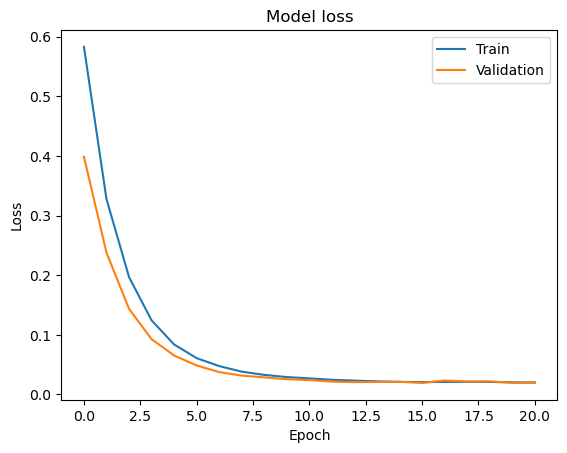

13/13 ━━━━━━━━━━━━━━━━━━━━ 1s 73ms/step
Test RMSE (Refined Attention Model): 8281.62
Test MAE (Refined Attention Model): 5236.37
Test R² (RRP - Refined Attention Model): 0.0036
Test R² (Demand - Refined Attention Model): 0.1240
45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 35ms/step


Training R² (RRP - Refined Attention Model): 0.6302
Training R² (Demand - Refined Attention Model): 0.3465
Training Accuracy (RRP - Refined Attention Model): 75.45%
Training Accuracy (Demand - Refined Attention Model): 92.91%
Model and components saved successfully.
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 40ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 38ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 39ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 43ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step
         date          rrp         demand
0  2025-11-09  2948.213379  111761.867188
1  2025-11-10  2955.304932  111641.625000
2  2025-11-11  2964.517334  111516.257812
3  2025-11-12  2975.377441  111397.531250
4  2025-11-13  2987.247070  111292.179688
5  2025-11-14  2999.516846  111202.992188
6  2025-11-15  3011.626465  111129.445312
7  2025-11-16  3023.196533  111069.679688
8  2025-11-17  3033.856445  111022.398438
9  2025-11-18  3043.709961  110984.195312


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


In [21]:
import pandas as pd
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Load dataset
dataset_path = '../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/cleaned_dataset.csv'
df = pd.read_csv(dataset_path, parse_dates=['date'], index_col='date')

# Clip negative rrp values
df['rrp'] = df['rrp'].clip(lower=0)

# Feature Engineering: Add rolling averages for rrp and demand
df['rrp_rolling_7'] = df['rrp'].rolling(window=7).mean()
df['demand_rolling_7'] = df['demand'].rolling(window=7).mean()

# Add new time-related features
df['day_of_year'] = df.index.dayofyear
df['is_weekend'] = df.index.weekday >= 5  # 5: Saturday, 6: Sunday
df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)  # Summer months (June to August)

# Add weather-related rolling features
df['min_temperature_rolling_7'] = df['min_temperature'].rolling(window=7).mean()
df['max_temperature_rolling_7'] = df['max_temperature'].rolling(window=7).mean()
df['solar_exposure_rolling_7'] = df['solar_exposure'].rolling(window=7).mean()

# Add month-related one-hot encoding features
df = pd.concat([df, pd.get_dummies(df['month'], prefix='month')], axis=1)

# Add lag features
df['demand_lag1'] = df['demand'].shift(1)
df['demand_lag7'] = df['demand'].shift(7)
df['demand_lag30'] = df['demand'].shift(30)
df['rrp_lag1'] = df['rrp'].shift(1)
df['rrp_lag7'] = df['rrp'].shift(7)
df['rrp_lag30'] = df['rrp'].shift(30)

# Fill missing values
df.bfill(inplace=True)
df.ffill(inplace=True)

# Define features and targets
features = ['min_temperature', 'max_temperature', 'solar_exposure', 'holiday', 'school_day', 
            'rrp_lag1', 'rrp_lag7', 'rrp_lag30', 'demand_lag1', 'demand_lag7', 'demand_rolling_7', 
            'rrp_rolling_7', 'demand_rolling_7', 'day_of_year', 'is_weekend', 'is_summer', 
            'min_temperature_rolling_7', 'max_temperature_rolling_7', 'solar_exposure_rolling_7'] + \
           [f'month_{i}' for i in range(1, 13)]

targets = ['rrp', 'demand']

# Scale features and targets
scaler_x = StandardScaler()
scaler_y = MinMaxScaler()

# Scale features
scaled_features = scaler_x.fit_transform(df[features])

# Scale targets
scaled_targets = scaler_y.fit_transform(df[targets])

# Update DataFrame with scaled features and targets
df[features] = scaled_features
df[targets] = scaled_targets

# Create sequences
sequence_length = 50  # Reduced from 75
def create_sequences(data, targets, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(targets[i+sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(df[features].values, df[targets].values, sequence_length)

# Split data
split = int(len(X) * 0.8)
val_split = int(split * 0.9)  # 10% of training data for validation
X_train, X_val, X_test = X[:val_split], X[val_split:split], X[split:]
y_train, y_val, y_test = y[:val_split], y[val_split:split], y[split:]

# Optionally, you can also save the cleaned DataFrame if needed
df_cleaned.to_csv('../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/processed_data/processed_dataset.csv')

# Scaled Dot-Product Attention Layer
class ScaledDotProductAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ScaledDotProductAttention, self).__init__(**kwargs)

    def call(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        d_k = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(d_k)
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

# Multi-Head Attention Layer
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.d_model = d_model
        self.dense_q = Dense(d_model)
        self.dense_k = Dense(d_model)
        self.dense_v = Dense(d_model)
        self.attention = ScaledDotProductAttention()

    def call(self, query, key, value):
        query = self.dense_q(query)
        key = self.dense_k(key)
        value = self.dense_v(value)

        query = tf.reshape(query, (-1, tf.shape(query)[1], self.num_heads, self.d_model // self.num_heads))
        key = tf.reshape(key, (-1, tf.shape(key)[1], self.num_heads, self.d_model // self.num_heads))
        value = tf.reshape(value, (-1, tf.shape(value)[1], self.num_heads, self.d_model // self.num_heads))

        attention_output, attention_weights = self.attention(query, key, value)
        attention_output = tf.reshape(attention_output, (-1, tf.shape(attention_output)[1], self.d_model))
        return attention_output, attention_weights

# Updated model with refined attention mechanism
def build_refined_attention_model(input_shape):
    inputs = Input(shape=input_shape)
    
    # LSTM layer
    x = LSTM(128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01))(inputs)
    x = Dropout(0.6)(x)
    x = BatchNormalization()(x)
    
    # Multi-Head Attention
    attention_output, attention_weights = MultiHeadAttention(d_model=128, num_heads=4)(x, x, x)
    x = Concatenate()([x, attention_output])
    
    # LSTM layer after attention
    x = LSTM(64, return_sequences=True)(x)
    x = Dropout(0.6)(x)
    x = BatchNormalization()(x)
    
    # Final LSTM layer
    x = LSTM(32, return_sequences=False)(x)
    x = Dense(16, activation='relu')(x)
    output = Dense(2)(x)  # Output for both RRP and Demand (multivariate prediction)
    
    # Build and compile the model
    model = tf.keras.Model(inputs=inputs, outputs=output)
    model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')
    
    return model

# Build and train the refined attention model
model_refined_attention = build_refined_attention_model(input_shape=(sequence_length, len(features)))
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model
history = model_refined_attention.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), 
                                      callbacks=[reduce_lr, early_stopping])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()


# Evaluate the refined model
y_test_pred_refined_attention = model_refined_attention.predict(X_test)
y_test_pred_actual_refined_attention = np.maximum(scaler_y.inverse_transform(y_test_pred_refined_attention), 0)

# Calculate R² for both RRP and Demand predictions
test_rmse_refined_attention = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), y_test_pred_actual_refined_attention))
test_mae_refined_attention = mean_absolute_error(scaler_y.inverse_transform(y_test), y_test_pred_actual_refined_attention)
test_r2_refined_attention_rrp = r2_score(scaler_y.inverse_transform(y_test)[:, 0], y_test_pred_actual_refined_attention[:, 0])  # R² for RRP
test_r2_refined_attention_demand = r2_score(scaler_y.inverse_transform(y_test)[:, 1], y_test_pred_actual_refined_attention[:, 1])  # R² for Demand

print(f"Test RMSE (Refined Attention Model): {test_rmse_refined_attention:.2f}")
print(f"Test MAE (Refined Attention Model): {test_mae_refined_attention:.2f}")
print(f"Test R² (RRP - Refined Attention Model): {test_r2_refined_attention_rrp:.4f}")
print(f"Test R² (Demand - Refined Attention Model): {test_r2_refined_attention_demand:.4f}")

# After training the model and calculating the R² scores for training
train_predictions = model_refined_attention.predict(X_train)

# Calculate training accuracy (R² on the training set)
train_r2_rrp = r2_score(scaler_y.inverse_transform(y_train)[:, 0], np.maximum(scaler_y.inverse_transform(train_predictions)[:, 0], 0))
train_r2_demand = r2_score(scaler_y.inverse_transform(y_train)[:, 1], np.maximum(scaler_y.inverse_transform(train_predictions)[:, 1], 0))

print(f"Training R² (RRP - Refined Attention Model): {train_r2_rrp:.4f}")
print(f"Training R² (Demand - Refined Attention Model): {train_r2_demand:.4f}")

# Function to calculate accuracy separately for RRP and demand
def calculate_accuracy(y_true, y_pred):
    # Calculate accuracy for RRP
    acc_rrp = 100 - np.mean(2 * np.abs(y_pred[:, 0] - y_true[:, 0]) / (np.abs(y_pred[:, 0]) + np.abs(y_true[:, 0]) + 1e-8)) * 100
    # Calculate accuracy for Demand
    acc_demand = 100 - np.mean(2 * np.abs(y_pred[:, 1] - y_true[:, 1]) / (np.abs(y_pred[:, 1]) + np.abs(y_true[:, 1]) + 1e-8)) * 100
    return acc_rrp, acc_demand

# Calculate training accuracy
train_acc_rrp, train_acc_demand = calculate_accuracy(scaler_y.inverse_transform(y_train), np.maximum(scaler_y.inverse_transform(train_predictions), 0))

# Print training accuracy for both RRP and Demand
print(f"Training Accuracy (RRP - Refined Attention Model): {train_acc_rrp:.2f}%")
print(f"Training Accuracy (Demand - Refined Attention Model): {train_acc_demand:.2f}%")

# Save the model and scalers
import joblib

# Saving the model
model_refined_attention.save('../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/model/refined_attention_model.h5')

# Saving the scalers using joblib
joblib.dump(scaler_x, '../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/model/scaler_x.pkl')  # Save feature scaler
joblib.dump(scaler_y, '../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/model/scaler_y.pkl')  # Save target scaler

# Optionally save any other classes, if defined in separate modules or necessary for future use
joblib.dump(ScaledDotProductAttention, '../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/model/scaled_dot_product_attention.pkl')
joblib.dump(MultiHeadAttention, '../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/model/multi_head_attention.pkl')

print("Model and components saved successfully.")

# Future Prediction using the attention-based model
def predict_future(start_date, num_days):
    last_sequence = df[features].values[-sequence_length:]  # Get the last available sequence
    future_predictions = []
    current_date = pd.to_datetime(start_date)
    
    for _ in range(num_days):
        # Reshape last sequence and make prediction
        input_seq = np.expand_dims(last_sequence, axis=0)
        pred = model_refined_attention.predict(input_seq)[0]  # Corrected to use model_refined_attention
        
        # Inverse transform the predictions
        pred_actual = scaler_y.inverse_transform(pred.reshape(1, -1))[0]

        future_predictions.append({
            'date': current_date.strftime('%Y-%m-%d'),
            'rrp': max(pred_actual[0], 0),  # Ensure RRP is non-negative
            'demand': max(pred_actual[1], 0)  # Ensure Demand is non-negative
        })
        
        # Update the last_sequence with new predictions
        # Prepare the next input sequence by replacing the last row with the new predictions
        pred_reshaped = np.copy(last_sequence[-1])
        
        # Ensure the predicted values are placed into the correct locations
        pred_reshaped[:len(targets)] = scaler_y.transform(pred_actual.reshape(1, -1))  # Correct scaling
        
        # You might need to dynamically update non-target features (e.g., weather data)
        # For now, assuming weather and other features remain constant
        pred_reshaped[len(targets):] = last_sequence[-1, len(targets):]  # Update with previous weather data
        
        # Update last_sequence by appending the new predicted values
        last_sequence = np.vstack([last_sequence[1:], pred_reshaped])

        # Move to the next day
        current_date += pd.Timedelta(days=1)
    
    return pd.DataFrame(future_predictions)

# Example usage
future_df = predict_future('2025-11-09', 10)
print(future_df)



Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 13s 218ms/step - loss: 0.7562 - val_loss: 0.4445 - learning_rate: 0.0010
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 150ms/step - loss: 0.3809 - val_loss: 0.2243 - learning_rate: 0.0010
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.1909 - val_loss: 0.1144 - learning_rate: 0.0010
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 148ms/step - loss: 0.0962 - val_loss: 0.0612 - learning_rate: 0.0010
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - loss: 0.0527 - val_loss: 0.0375 - learning_rate: 0.0010
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 152ms/step - loss: 0.0342 - val_loss: 0.0276 - learning_rate: 0.0010
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.0244 - val_loss: 0.0248 - learning_rate: 0.0010
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 153ms/step - loss: 0.0206 - val_loss: 0.0187 - learning_rate: 0.0010
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 152ms/step - loss: 0.0188 - val_loss: 0.0195 - learning_rate: 0.0010
Epoch 10/

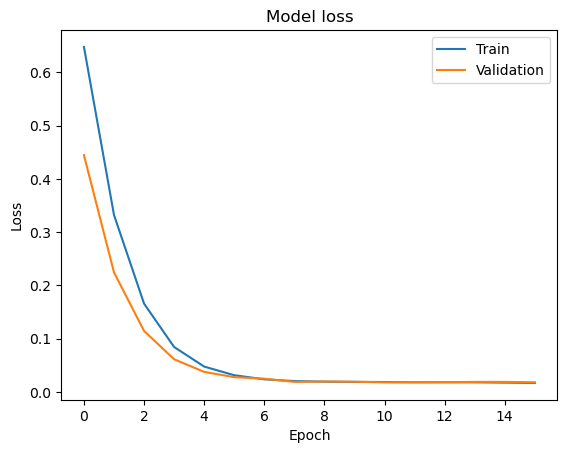

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 84ms/step
Test RMSE (Refined Attention Model): 0.15
Test MAE (Refined Attention Model): 0.12
Test R² (RRP - Refined Attention Model): -0.0091
Test R² (Demand - Refined Attention Model): 0.3715
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 86ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 54ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 44ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 48ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 47ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 35ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
         date       rrp    demand
0  2025-11-09  0.365174  0.332306
1  2025-11-10  0.368616  0.327867
2  2025-11-11  0.372691  0.323293
3  2025-11-12  0.377204  0.318876
4  2025-11-13  0.381948  0.314830
5  2025-11-14  0.386740  0.311333
6  2025-11-15  0.390805  0.310009
7  2025-11-16  0.394564  0.309347
8  2025-11-17  0.397925  0.309268
9  2025-11-18  0.400899  0.309741


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


45/45 ━━━━━━━━━━━━━━━━━━━━ 2s 43ms/step
Training Accuracy (RRP - Refined Attention Model): 78.72%
Training Accuracy (Demand - Refined Attention Model): 72.35%


In [17]:
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.layers import Input, LSTM, Dense, Dropout, BatchNormalization, Concatenate
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import joblib
import matplotlib.pyplot as plt

# Load dataset
dataset_path = '../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/processed_data/processed_dataset.csv'
df = pd.read_csv(dataset_path, parse_dates=['date'], index_col='date')

# Clip negative rrp values
df['rrp'] = df['rrp'].clip(lower=0)

# Feature Engineering: Add rolling averages for rrp and demand
df['rrp_rolling_7'] = df['rrp'].rolling(window=7).mean()
df['demand_rolling_7'] = df['demand'].rolling(window=7).mean()

# Add new time-related features
df['day_of_year'] = df.index.dayofyear
df['is_weekend'] = df.index.weekday >= 5  # 5: Saturday, 6: Sunday
# Create the 'month' column based on the 'date' index
df['month'] = df.index.month

# Now you can proceed with the rest of your feature engineering steps
df['is_summer'] = df['month'].isin([6, 7, 8]).astype(int)  # Summer months (June to August)

# Add weather-related rolling features
df['min_temperature_rolling_7'] = df['min_temperature'].rolling(window=7).mean()
df['max_temperature_rolling_7'] = df['max_temperature'].rolling(window=7).mean()
df['solar_exposure_rolling_7'] = df['solar_exposure'].rolling(window=7).mean()

# Add month-related one-hot encoding features
df = pd.concat([df, pd.get_dummies(df['month'], prefix='month')], axis=1)

# Add lag features
df['demand_lag1'] = df['demand'].shift(1)
df['demand_lag7'] = df['demand'].shift(7)
df['demand_lag30'] = df['demand'].shift(30)
df['rrp_lag1'] = df['rrp'].shift(1)
df['rrp_lag7'] = df['rrp'].shift(7)
df['rrp_lag30'] = df['rrp'].shift(30)

# Fill missing values
df.bfill(inplace=True)
df.ffill(inplace=True)

# Define features and targets
features = ['min_temperature', 'max_temperature', 'solar_exposure', 'holiday', 'school_day', 
            'rrp_lag1', 'rrp_lag7', 'rrp_lag30', 'demand_lag1', 'demand_lag7', 'demand_rolling_7', 
            'rrp_rolling_7', 'demand_rolling_7', 'day_of_year', 'is_weekend', 'is_summer', 
            'min_temperature_rolling_7', 'max_temperature_rolling_7', 'solar_exposure_rolling_7'] + \
           [f'month_{i}' for i in range(1, 13)]

targets = ['rrp', 'demand']

# Scale features and targets
scaler_x = StandardScaler()
scaler_y = MinMaxScaler()

# Scale features
scaled_features = scaler_x.fit_transform(df[features])

# Scale targets
scaled_targets = scaler_y.fit_transform(df[targets])

# Update DataFrame with scaled features and targets
df[features] = scaled_features
df[targets] = scaled_targets

# Save the scalers for future use
joblib.dump(scaler_x, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

# Create sequences
sequence_length = 50  # Reduced from 75
def create_sequences(data, targets, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(targets[i+sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(df[features].values, df[targets].values, sequence_length)

# Split data
split = int(len(X) * 0.8)
val_split = int(split * 0.9)  # 10% of training data for validation
X_train, X_val, X_test = X[:val_split], X[val_split:split], X[split:]
y_train, y_val, y_test = y[:val_split], y[val_split:split], y[split:]

# Optionally, you can also save the cleaned DataFrame if needed
df_cleaned.to_csv('../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/processed_data/processed_dataset.csv')

# Scaled Dot-Product Attention Layer
class ScaledDotProductAttention(tf.keras.layers.Layer):
    def __init__(self, **kwargs):
        super(ScaledDotProductAttention, self).__init__(**kwargs)

    def call(self, query, key, value):
        matmul_qk = tf.matmul(query, key, transpose_b=True)
        d_k = tf.cast(tf.shape(key)[-1], tf.float32)
        scaled_attention_logits = matmul_qk / tf.math.sqrt(d_k)
        attention_weights = tf.nn.softmax(scaled_attention_logits, axis=-1)
        output = tf.matmul(attention_weights, value)
        return output, attention_weights

# Multi-Head Attention Layer
class MultiHeadAttention(tf.keras.layers.Layer):
    def __init__(self, d_model, num_heads, **kwargs):
        super(MultiHeadAttention, self).__init__(**kwargs)
        self.num_heads = num_heads
        self.d_model = d_model
        self.dense_q = Dense(d_model)
        self.dense_k = Dense(d_model)
        self.dense_v = Dense(d_model)
        self.attention = ScaledDotProductAttention()

    def call(self, query, key, value):
        query = self.dense_q(query)
        key = self.dense_k(key)
        value = self.dense_v(value)

        query = tf.reshape(query, (-1, tf.shape(query)[1], self.num_heads, self.d_model // self.num_heads))
        key = tf.reshape(key, (-1, tf.shape(key)[1], self.num_heads, self.d_model // self.num_heads))
        value = tf.reshape(value, (-1, tf.shape(value)[1], self.num_heads, self.d_model // self.num_heads))

        attention_output, attention_weights = self.attention(query, key, value)
        attention_output = tf.reshape(attention_output, (-1, tf.shape(attention_output)[1], self.d_model))
        return attention_output, attention_weights

# Updated model with refined attention mechanism
class RefinedAttentionModel(tf.keras.Model):
    def __init__(self, input_shape, **kwargs):
        super(RefinedAttentionModel, self).__init__(**kwargs)
        
        # LSTM layer
        self.lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01))
        self.dropout1 = Dropout(0.6)
        self.batchnorm1 = BatchNormalization()
        
        # Multi-Head Attention
        self.multi_head_attention = MultiHeadAttention(d_model=128, num_heads=4)
        
        # LSTM layer after attention
        self.lstm2 = LSTM(64, return_sequences=True)
        self.dropout2 = Dropout(0.6)
        self.batchnorm2 = BatchNormalization()
        
        # Final LSTM layer
        self.lstm3 = LSTM(32, return_sequences=False)
        self.dense1 = Dense(16, activation='relu')
        self.output_layer = Dense(2)  # Output for both RRP and Demand (multivariate prediction)

    def call(self, inputs):
        x = self.lstm1(inputs)
        x = self.dropout1(x)
        x = self.batchnorm1(x)
        
        # Apply Multi-Head Attention
        attention_output, attention_weights = self.multi_head_attention(x, x, x)
        x = Concatenate()([x, attention_output])
        
        x = self.lstm2(x)
        x = self.dropout2(x)
        x = self.batchnorm2(x)
        
        x = self.lstm3(x)
        x = self.dense1(x)
        output = self.output_layer(x)
        
        return output

# Build and train the refined attention model
model_refined_attention = RefinedAttentionModel(input_shape=(sequence_length, len(features)))
model_refined_attention.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001), loss='mse')

reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)

# Fit model
history = model_refined_attention.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val), 
                                      callbacks=[reduce_lr, early_stopping])

# Plot training & validation loss values
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

# Save the model using the native Keras format
model_refined_attention.save('refined_attention_model_with_custom_classes.keras')


# Evaluate the refined model
y_test_pred_refined_attention = model_refined_attention.predict(X_test)
y_test_pred_actual_refined_attention = np.maximum(scaler_y.inverse_transform(y_test_pred_refined_attention), 0)

# Calculate R² for both RRP and Demand predictions
test_rmse_refined_attention = np.sqrt(mean_squared_error(scaler_y.inverse_transform(y_test), y_test_pred_actual_refined_attention))
test_mae_refined_attention = mean_absolute_error(scaler_y.inverse_transform(y_test), y_test_pred_actual_refined_attention)
test_r2_refined_attention_rrp = r2_score(scaler_y.inverse_transform(y_test)[:, 0], y_test_pred_actual_refined_attention[:, 0])  # R² for RRP
test_r2_refined_attention_demand = r2_score(scaler_y.inverse_transform(y_test)[:, 1], y_test_pred_actual_refined_attention[:, 1])  # R² for Demand

print(f"Test RMSE (Refined Attention Model): {test_rmse_refined_attention:.2f}")
print(f"Test MAE (Refined Attention Model): {test_mae_refined_attention:.2f}")
print(f"Test R² (RRP - Refined Attention Model): {test_r2_refined_attention_rrp:.4f}")
print(f"Test R² (Demand - Refined Attention Model): {test_r2_refined_attention_demand:.4f}")


# Future Prediction using the attention-based model
def predict_future(start_date, num_days):
    last_sequence = df[features].values[-sequence_length:]
    future_predictions = []
    current_date = pd.to_datetime(start_date)
    
    for _ in range(num_days):
        input_seq = np.expand_dims(last_sequence, axis=0)
        pred = model_refined_attention.predict(input_seq)[0]
        pred_actual = scaler_y.inverse_transform(np.array(pred).reshape(1, -1))[0]

        future_predictions.append({
            'date': current_date.strftime('%Y-%m-%d'),
            'rrp': max(pred_actual[0], 0),
            'demand': max(pred_actual[1], 0)
        })
        
        # Update the input sequence by adding the new predictions
        pred_reshaped = np.copy(last_sequence[-1])
        pred_reshaped[:len(targets)] = scaler_y.transform(pred_actual.reshape(1, -1))  # Correct scaling
        
        # Dynamically update non-target features if necessary (e.g., weather)
        pred_reshaped[len(targets):] = last_sequence[-1, len(targets):]
        
        # Update last sequence with new input
        last_sequence = np.vstack([last_sequence[1:], pred_reshaped])

        current_date += pd.Timedelta(days=1)
    
    return pd.DataFrame(future_predictions)

# Example usage
future_df = predict_future('2025-11-09', 10)
print(future_df)

# Function to calculate accuracy separately for RRP and demand
def calculate_accuracy(y_true, y_pred):
    epsilon = 1e-8  # Small value to avoid division by zero
    acc_rrp = 100 - np.mean(2 * np.abs(y_pred[:, 0] - y_true[:, 0]) / (np.abs(y_pred[:, 0]) + np.abs(y_true[:, 0]) + epsilon)) * 100
    acc_demand = 100 - np.mean(2 * np.abs(y_pred[:, 1] - y_true[:, 1]) / (np.abs(y_pred[:, 1]) + np.abs(y_true[:, 1]) + epsilon)) * 100
    return acc_rrp, acc_demand

# Generate predictions on the training set (using the trained model)
train_predictions = model_refined_attention.predict(X_train)

# Inverse transform predictions and true values
train_predictions_actual = np.maximum(scaler_y.inverse_transform(train_predictions), 0)
y_train_actual = scaler_y.inverse_transform(y_train)

# Calculate training accuracy
train_acc_rrp, train_acc_demand = calculate_accuracy(y_train_actual, train_predictions_actual)

print(f"Training Accuracy (RRP - Refined Attention Model): {train_acc_rrp:.2f}%")
print(f"Training Accuracy (Demand - Refined Attention Model): {train_acc_demand:.2f}%")


c:\Users\saina\anaconda3\Lib\site-packages\keras\src\layers\rnn\rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Model: "lstm_with_attention_model_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ lstm_3 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_4 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ ?                      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ ?                      │   0 (unbuilt) │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_5 (LSTM)                   │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ ?                      │   0 (unbuilt) │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ ?                      │   0 (unbuilt) │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 0 (0.00 B)

 Trainable params: 0 (0.00 B)

 Non-trainable params: 0 (0.00 B)

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 10s 168ms/step - loss: 0.8975 - val_loss: 0.4976 - learning_rate: 0.0010
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 137ms/step - loss: 0.4298 - val_loss: 0.2640 - learning_rate: 0.0010
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 140ms/step - loss: 0.2283 - val_loss: 0.1418 - learning_rate: 0.0010
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 133ms/step - loss: 0.1228 - val_loss: 0.0808 - learning_rate: 0.0010
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 146ms/step - loss: 0.0719 - val_loss: 0.0503 - learning_rate: 0.0010
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 3s 142ms/step - loss: 0.0462 - val_loss: 0.0339 - learning_rate: 0.0010
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 5s 133ms/step - loss: 0.0331 - val_loss: 0.0276 - learning_rate: 0.0010
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 185ms/step - loss: 0.0265 - val_loss: 0.0241 - learning_rate: 0.0010
Epoch 9/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 4s 181ms/step - loss: 0.0231 - val_loss: 0.0209 - learning_rate: 0.0010
Epoch 10/

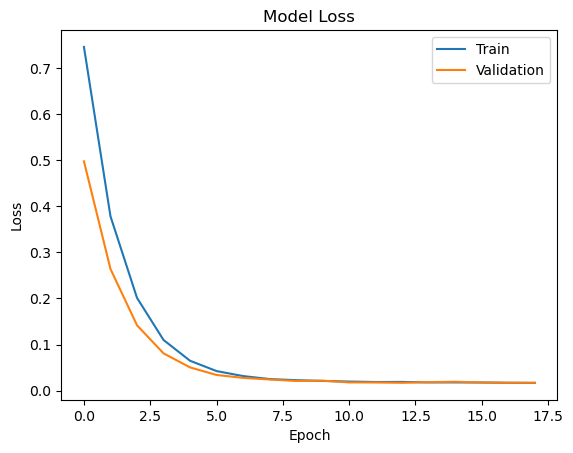

13/13 ━━━━━━━━━━━━━━━━━━━━ 2s 118ms/step
RMSE: 0.15
MAE: 0.12
R² (RRP): -0.0517
R² (Demand): 0.3865
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 69ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 129ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 78ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 79ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 51ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 66ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 55ms/step
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(
c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 71ms/step
         date       rrp    demand
0  2025-11-09  0.368176  0.309412
1  2025-11-10  0.372118  0.306180
2  2025-11-11  0.379924  0.300515
3  2025-11-12  0.388964  0.295439
4  2025-11-13  0.398152  0.291498
5  2025-11-14  0.407332  0.287856
6  2025-11-15  0.416073  0.284527
7  2025-11-16  0.423663  0.281795
8  2025-11-17  0.430116  0.279433
9  2025-11-18  0.435274  0.277476


c:\Users\saina\anaconda3\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but MinMaxScaler was fitted with feature names
  warnings.warn(


NameError: name 'model_refined_attention' is not defined

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler, MinMaxScaler
import joblib

# Load the dataset
dataset_path = '../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/processed_data/processed_dataset.csv'
df = pd.read_csv(dataset_path, parse_dates=['date'], index_col='date')

# Check for duplicated columns (e.g., weekday_1, weekday_1.1, month_2, month_2.1)
duplicate_columns = [col for col in df.columns if '.1' in col]  # Identify columns with '.1' suffix
df_cleaned = df.drop(columns=duplicate_columns)  # Drop duplicate columns

# Ensure no missing data after cleaning
df_cleaned.bfill(inplace=True)
df_cleaned.ffill(inplace=True)

# Feature engineering for cyclical features: weekday and month
df_cleaned['weekday_sin'] = np.sin(2 * np.pi * df_cleaned['day_of_week'] / 7)
df_cleaned['weekday_cos'] = np.cos(2 * np.pi * df_cleaned['day_of_week'] / 7)
# Ensure 'date' column exists and extract month
df_cleaned['month'] = df_cleaned.index.month

# Feature engineering for cyclical features: weekday and month
df_cleaned['weekday_sin'] = np.sin(2 * np.pi * df_cleaned['day_of_week'] / 7)
df_cleaned['weekday_cos'] = np.cos(2 * np.pi * df_cleaned['day_of_week'] / 7)
df_cleaned['month_sin'] = np.sin(2 * np.pi * df_cleaned['month'] / 12)
df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)

df_cleaned['month_cos'] = np.cos(2 * np.pi * df_cleaned['month'] / 12)

# Define features and targets for scaling
features = ['demand', 'rrp', 'demand_pos_rrp', 'rrp_positive', 'demand_neg_rrp',
            'rrp_negative', 'frac_at_neg_rrp', 'min_temperature', 'max_temperature',
            'solar_exposure', 'rainfall', 'school_day', 'holiday', 'year', 'day',
            'demand_lag1', 'demand_lag2', 'demand_lag3', 'demand_rolling',
            'day_of_week', 'workday', 'rrp_lag1', 'rrp_lag7', 'rrp_lag14',
            'rrp_lag30', 'demand_lag7', 'demand_rolling7', 'demand_rolling30',
            'solar_exposure_lag1', 'solar_exposure_rolling7', 'rainfall_lag1',
            'rainfall_rolling7', 'day_of_year', 'is_weekend', 'is_summer',
            'is_winter', 'temp_solar_interaction', 'demand_rrp_interaction',
            'demand_squared', 'rrp_squared', 'weekday_sin', 'weekday_cos',
            'month_sin', 'month_cos']  # Include the new encoded features

targets = ['rrp', 'demand']

# Scale features
scaler_x = StandardScaler()
scaler_y = MinMaxScaler()

# Scale features and targets
scaled_features = scaler_x.fit_transform(df_cleaned[features])
scaled_targets = scaler_y.fit_transform(df_cleaned[targets])

# Update DataFrame with scaled features and targets
df_cleaned[features] = scaled_features
df_cleaned[targets] = scaled_targets

# Save the scalers for future use
joblib.dump(scaler_x, 'scaler_x.pkl')
joblib.dump(scaler_y, 'scaler_y.pkl')

# Create sequences for LSTM/GRU
sequence_length = 50  # Define sequence length for time series
def create_sequences(data, targets, sequence_length):
    X, y = [], []
    for i in range(len(data) - sequence_length):
        X.append(data[i:i+sequence_length])
        y.append(targets[i+sequence_length])
    return np.array(X), np.array(y)

X, y = create_sequences(df_cleaned[features].values, df_cleaned[targets].values, sequence_length)

# Split data into training, validation, and test sets
split = int(len(X) * 0.8)
val_split = int(split * 0.9)  # 10% of training data for validation
X_train, X_val, X_test = X[:val_split], X[val_split:split], X[split:]
y_train, y_val, y_test = y[:val_split], y[val_split:split], y[split:]

# Save the cleaned and processed data
np.save('X_train.npy', X_train)
np.save('y_train.npy', y_train)
np.save('X_val.npy', X_val)
np.save('y_val.npy', y_val)
np.save('X_test.npy', X_test)
np.save('y_test.npy', y_test)

# Optionally, you can also save the cleaned DataFrame if needed
df_cleaned.to_csv('../Electricity_Demand-and_Price_ForecastingInfosys_Internship_Oct2025/processed_data/processed_dataset.csv')

import tensorflow as tf
from tensorflow.keras.layers import LSTM, Dense, Dropout, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras import Input, Model

# Define the model architecture
class LSTMWithAttentionModel(tf.keras.Model):
    def __init__(self, input_shape):
        super(LSTMWithAttentionModel, self).__init__()

        # LSTM layers with dropout and batch normalization
        self.lstm1 = LSTM(128, return_sequences=True, kernel_regularizer=tf.keras.regularizers.l2(0.01), input_shape=input_shape)
        self.dropout1 = Dropout(0.6)
        self.batchnorm1 = BatchNormalization()

        self.lstm2 = LSTM(64, return_sequences=True)
        self.dropout2 = Dropout(0.6)
        self.batchnorm2 = BatchNormalization()

        self.lstm3 = LSTM(32, return_sequences=False)
        self.dense1 = Dense(16, activation='relu')
        self.output_layer = Dense(2)  # Output layer for RRP and Demand

    def call(self, inputs):
        x = self.lstm1(inputs)
        x = self.dropout1(x)
        x = self.batchnorm1(x)

        x = self.lstm2(x)
        x = self.dropout2(x)
        x = self.batchnorm2(x)

        x = self.lstm3(x)
        x = self.dense1(x)
        output = self.output_layer(x)

        return output

# Specify input shape based on the training data
input_shape = (X_train.shape[1], X_train.shape[2])

# Create the model
model = LSTMWithAttentionModel(input_shape=input_shape)

# Compile the model
model.compile(optimizer='adam', loss='mse')

# Model summary to check architecture
model.summary()


from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau

# Define callbacks
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)

# Train the model
history = model.fit(X_train, y_train, epochs=50, batch_size=64, validation_data=(X_val, y_val),
                    callbacks=[early_stopping, reduce_lr])

# Plot training & validation loss values
import matplotlib.pyplot as plt
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Evaluate on the test set
y_pred = model.predict(X_test)

# Inverse transform predictions and true values
y_pred_actual = np.maximum(scaler_y.inverse_transform(y_pred), 0)
y_test_actual = scaler_y.inverse_transform(y_test)

# Calculate RMSE, MAE, and R² for both RRP and Demand
rmse = np.sqrt(mean_squared_error(y_test_actual, y_pred_actual))
mae = mean_absolute_error(y_test_actual, y_pred_actual)
r2_rrp = r2_score(y_test_actual[:, 0], y_pred_actual[:, 0])
r2_demand = r2_score(y_test_actual[:, 1], y_pred_actual[:, 1])

print(f"RMSE: {rmse:.2f}")
print(f"MAE: {mae:.2f}")
print(f"R² (RRP): {r2_rrp:.4f}")
print(f"R² (Demand): {r2_demand:.4f}")

model.save('electricity_demand_forecasting_model.keras')  # No file extension needed

def predict_future(start_date, num_days):
    last_sequence = df[features].values[-sequence_length:]
    future_predictions = []
    current_date = pd.to_datetime(start_date)
    
    for _ in range(num_days):
        input_seq = np.expand_dims(last_sequence, axis=0)
        pred = model.predict(input_seq)[0]
        pred_actual = scaler_y.inverse_transform(np.array(pred).reshape(1, -1))[0]

        future_predictions.append({
            'date': current_date.strftime('%Y-%m-%d'),
            'rrp': max(pred_actual[0], 0),
            'demand': max(pred_actual[1], 0)
        })
        
        # Update the input sequence by adding the new predictions
        pred_reshaped = np.copy(last_sequence[-1])
        pred_reshaped[:len(targets)] = scaler_y.transform(pred_actual.reshape(1, -1))  # Correct scaling
        
        # Dynamically update non-target features if necessary (e.g., weather)
        pred_reshaped[len(targets):] = last_sequence[-1, len(targets):]
        
        # Update last sequence with new input
        last_sequence = np.vstack([last_sequence[1:], pred_reshaped])

        current_date += pd.Timedelta(days=1)
    
    return pd.DataFrame(future_predictions)

# Example usage for forecasting the next 10 days
future_df = predict_future('2025-11-09', 10)
print(future_df)

# Function to calculate accuracy separately for RRP and demand
def calculate_accuracy(y_true, y_pred):
    epsilon = 1e-8  # Small value to avoid division by zero
    acc_rrp = 100 - np.mean(2 * np.abs(y_pred[:, 0] - y_true[:, 0]) / (np.abs(y_pred[:, 0]) + np.abs(y_true[:, 0]) + epsilon)) * 100
    acc_demand = 100 - np.mean(2 * np.abs(y_pred[:, 1] - y_true[:, 1]) / (np.abs(y_pred[:, 1]) + np.abs(y_true[:, 1]) + epsilon)) * 100
    return acc_rrp, acc_demand

# Generate predictions on the training set (using the trained model)
train_predictions = model.predict(X_train)  # Use `model` here, not `model_refined_attention`

# Inverse transform predictions and true values
train_predictions_actual = np.maximum(scaler_y.inverse_transform(train_predictions), 0)
y_train_actual = scaler_y.inverse_transform(y_train)

# Calculate training accuracy
train_acc_rrp, train_acc_demand = calculate_accuracy(y_train_actual, train_predictions_actual)

print(f"Training Accuracy (RRP - Refined Attention Model): {train_acc_rrp:.2f}%")
print(f"Training Accuracy (Demand - Refined Attention Model): {train_acc_demand:.2f}%")
